# Germany EDA

Problem statement

To be capable of providing a complete de-confinement protocol for the policy makers. We need to deliver insights about the required health care capacities to meet a specific timeline, the recommended timeline for reopening/lockdown, the outcome of a given timeline.

For this, the main quantities that we'll be trying to estimate throughout time for a given region are:

- Number of active cases.
- Number of available beds at hospitals.
- Number of cumulated deaths.
- Number of recovered.

As first step of the project, we need to first 

~ get better understanding of our data
~ apply the suitable preprocessing
~ feature selection to get our data ready for modeling.

#### User Type Objectives :
- I should be capable of knowing the number of missing values per column.
- The approach that I will be using to handle missing values.
- I should be able of knowing the required transformations and preprocessing that will be applied per column.
- I should be able of knowing the distribution of the variables, the correlation between the variables.
- I should be capable of knowing the collinearity of the variables.
- I should be able of knowing the data reduction techniques that will be applied.
- I should be able of selecting the features relevant to predicting the main target quantities stated in the overview.

#### Success criteria

The criteria that must be met in order to consider this project a success. 

- Delivering a notebook having the following structure:
1. 1st header - Germany EDA
2. a paragraph where you explain the main goal of this project and the outline of the notebook.
3. Importing required libraries.
4. Loading dataset.
5. Exploratory data analysis.
    1. Univariate analysis
    2. Bivariate analysis

In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
from scipy import stats
import datetime as dt
%matplotlib inline 

In [ ]:
#Loading dataset
df = pd.read_csv("linear-comprehensive-covid-data.csv")

In [ ]:
#Filtering
df_germany = df[df['location']=='Germany']
# drop duplicate
df_germany.drop_duplicates(inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#sort
df_germany = df_germany.reindex(sorted(df_germany.columns), axis=1  )

In [ ]:
df_germany.head(5)

,aged_65_older,aged_70_older,cardiovasc_death_rate,continent,date,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,...,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,total_vaccinations_per_hundred,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million
26027,21.453,15.957,156.139,Europe,2020-01-27,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26028,21.453,15.957,156.139,Europe,2020-01-28,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26029,21.453,15.957,156.139,Europe,2020-01-29,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26030,21.453,15.957,156.139,Europe,2020-01-30,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26031,21.453,15.957,156.139,Europe,2020-01-31,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#reset index
df_ger = df_germany.reset_index(drop=True)


In [ ]:
df_ger.dtypes

aged_65_older                            float64
aged_70_older                            float64
cardiovasc_death_rate                    float64
continent                                 object
date                                      object
diabetes_prevalence                      float64
extreme_poverty                          float64
female_smokers                           float64
gdp_per_capita                           float64
handwashing_facilities                   float64
hosp_patients                            float64
hosp_patients_per_million                float64
hospital_beds_per_thousand               float64
human_development_index                  float64
icu_patients                             float64
icu_patients_per_million                 float64
iso_code                                  object
life_expectancy                          float64
location                                  object
male_smokers                             float64
median_age          

In [ ]:
df_ger.head(10)

,aged_65_older,aged_70_older,cardiovasc_death_rate,continent,date,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,...,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,total_vaccinations_per_hundred,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million
0,21.453,15.957,156.139,Europe,2020-01-27,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21.453,15.957,156.139,Europe,2020-01-28,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.453,15.957,156.139,Europe,2020-01-29,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.453,15.957,156.139,Europe,2020-01-30,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.453,15.957,156.139,Europe,2020-01-31,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21.453,15.957,156.139,Europe,2020-02-01,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21.453,15.957,156.139,Europe,2020-02-02,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.727,1.178,NaN,NaN
7,21.453,15.957,156.139,Europe,2020-02-03,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21.453,15.957,156.139,Europe,2020-02-04,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,21.453,15.957,156.139,Europe,2020-02-05,8.31,NaN,28.2,45229.245,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ger.shape

(413, 59)

In [ ]:
df_ger.columns

Index(['aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'continent',
       'date', 'diabetes_prevalence', 'extreme_poverty', 'female_smokers',
       'gdp_per_capita', 'handwashing_facilities', 'hosp_patients',
       'hosp_patients_per_million', 'hospital_beds_per_thousand',
       'human_development_index', 'icu_patients', 'icu_patients_per_million',
       'iso_code', 'life_expectancy', 'location', 'male_smokers', 'median_age',
       'new_cases', 'new_cases_per_million', 'new_cases_smoothed',
       'new_cases_smoothed_per_million', 'new_deaths',
       'new_deaths_per_million', 'new_deaths_smoothed',
       'new_deaths_smoothed_per_million', 'new_tests',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'new_vaccinations',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_vaccinated_per_hun

In [ ]:
# Missing values 

df_ger.isna().sum()


aged_65_older                              0
aged_70_older                              0
cardiovasc_death_rate                      0
continent                                  0
date                                       0
diabetes_prevalence                        0
extreme_poverty                          413
female_smokers                             0
gdp_per_capita                             0
handwashing_facilities                   413
hosp_patients                            413
hosp_patients_per_million                413
hospital_beds_per_thousand                 0
human_development_index                    0
icu_patients                              92
icu_patients_per_million                  92
iso_code                                   0
life_expectancy                            0
location                                   0
male_smokers                               0
median_age                                 0
new_cases                                  0
new_cases_

In [ ]:
a =[[col,df_ger[col].isna().sum()] for col in df_ger.columns if df_ger[col].isna().any()] # total columns with missing values 
b=[ [col,df_ger[col].isna().sum()] for col in df_ger.columns if df_ger[col].isna().all()] # All values missing 
missing_value_col = [ element for element in a if element not in b] # Columns in which we need to replace missing values 
l = [i[0] for i in missing_value_col]
print(a)
print(b)
print( [i[0] for i in b])
missing_value_col


[['extreme_poverty', 413], ['handwashing_facilities', 413], ['hosp_patients', 413], ['hosp_patients_per_million', 413], ['icu_patients', 92], ['icu_patients_per_million', 92], ['new_cases_smoothed', 5], ['new_cases_smoothed_per_million', 5], ['new_deaths', 42], ['new_deaths_per_million', 42], ['new_deaths_smoothed', 5], ['new_deaths_smoothed_per_million', 5], ['new_tests', 413], ['new_tests_per_thousand', 413], ['new_tests_smoothed', 62], ['new_tests_smoothed_per_thousand', 62], ['new_vaccinations', 338], ['new_vaccinations_smoothed', 338], ['new_vaccinations_smoothed_per_million', 338], ['people_fully_vaccinated', 355], ['people_fully_vaccinated_per_hundred', 355], ['people_vaccinated', 337], ['people_vaccinated_per_hundred', 337], ['positive_rate', 361], ['reproduction_rate', 36], ['stringency_index', 1], ['tests_per_case', 361], ['tests_units', 55], ['total_deaths', 42], ['total_deaths_per_million', 42], ['total_tests', 361], ['total_tests_per_thousand', 361], ['total_vaccinations',

[['icu_patients', 92],
 ['icu_patients_per_million', 92],
 ['new_cases_smoothed', 5],
 ['new_cases_smoothed_per_million', 5],
 ['new_deaths', 42],
 ['new_deaths_per_million', 42],
 ['new_deaths_smoothed', 5],
 ['new_deaths_smoothed_per_million', 5],
 ['new_tests_smoothed', 62],
 ['new_tests_smoothed_per_thousand', 62],
 ['new_vaccinations', 338],
 ['new_vaccinations_smoothed', 338],
 ['new_vaccinations_smoothed_per_million', 338],
 ['people_fully_vaccinated', 355],
 ['people_fully_vaccinated_per_hundred', 355],
 ['people_vaccinated', 337],
 ['people_vaccinated_per_hundred', 337],
 ['positive_rate', 361],
 ['reproduction_rate', 36],
 ['stringency_index', 1],
 ['tests_per_case', 361],
 ['tests_units', 55],
 ['total_deaths', 42],
 ['total_deaths_per_million', 42],
 ['total_tests', 361],
 ['total_tests_per_thousand', 361],
 ['total_vaccinations', 337],
 ['total_vaccinations_per_hundred', 337],
 ['weekly_hosp_admissions', 355],
 ['weekly_hosp_admissions_per_million', 355]]

- To replace the missing values we need to check skewness and distribution of each columns and replace them accordingly . 


In [ ]:
df_ger.select_dtypes(np.object)

,continent,date,iso_code,location,tests_units
0,Europe,2020-01-27,DEU,Germany,NaN
1,Europe,2020-01-28,DEU,Germany,NaN
2,Europe,2020-01-29,DEU,Germany,NaN
3,Europe,2020-01-30,DEU,Germany,NaN
4,Europe,2020-01-31,DEU,Germany,NaN
...,...,...,...,...,...
408,Europe,2021-03-10,DEU,Germany,NaN
409,Europe,2021-03-11,DEU,Germany,NaN
410,Europe,2021-03-12,DEU,Germany,NaN
411,Europe,2021-03-13,DEU,Germany,NaN


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


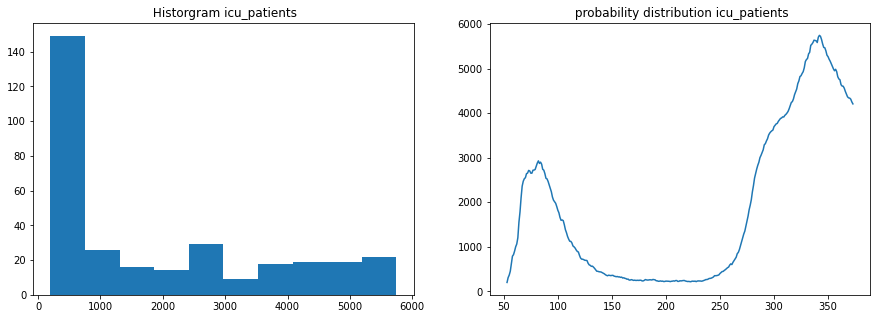

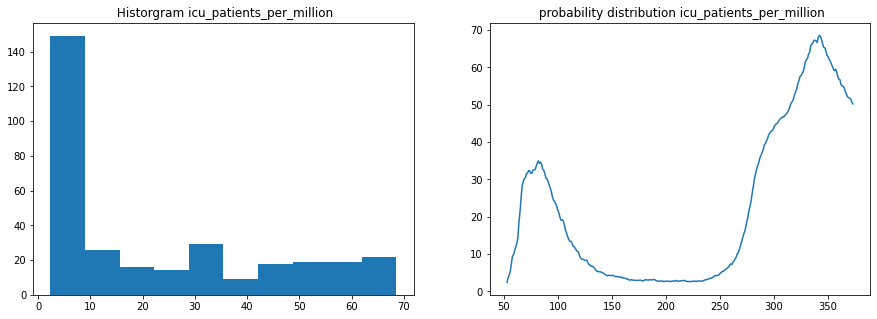

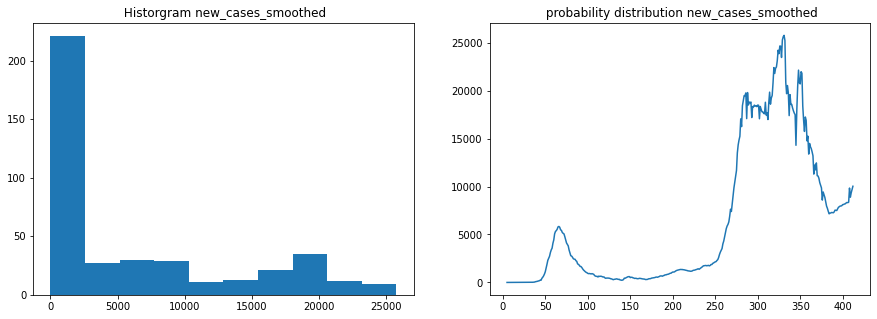

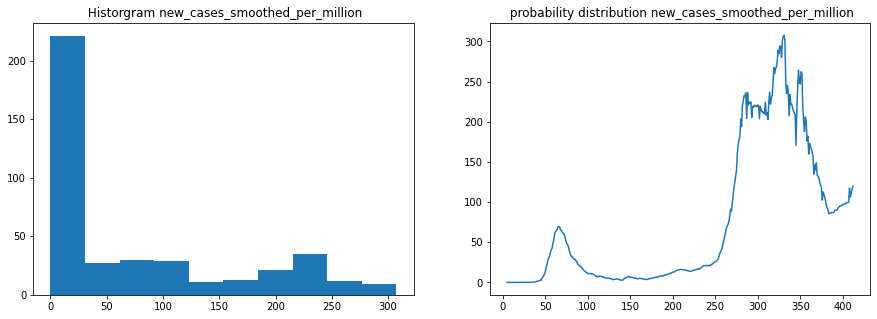

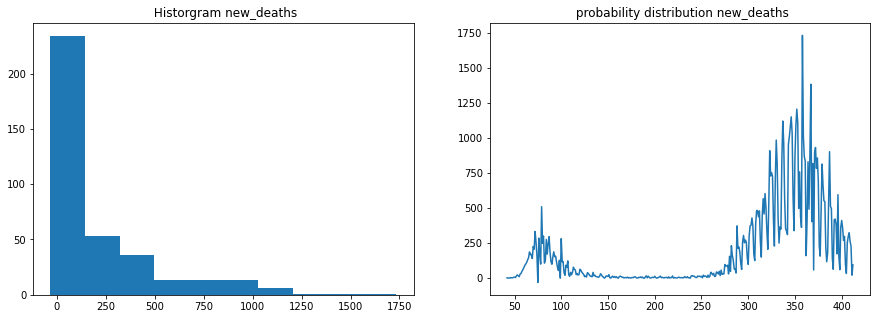

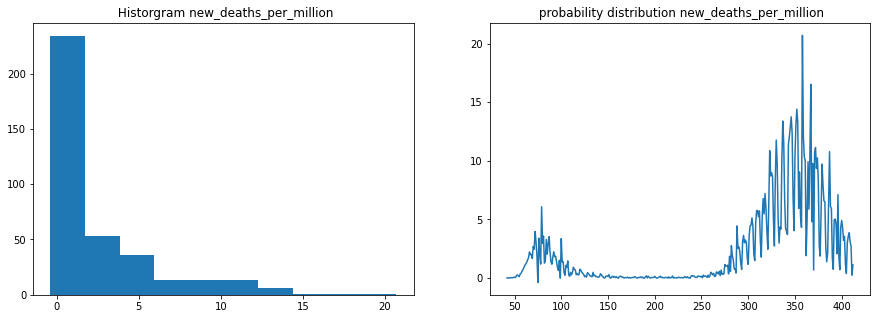

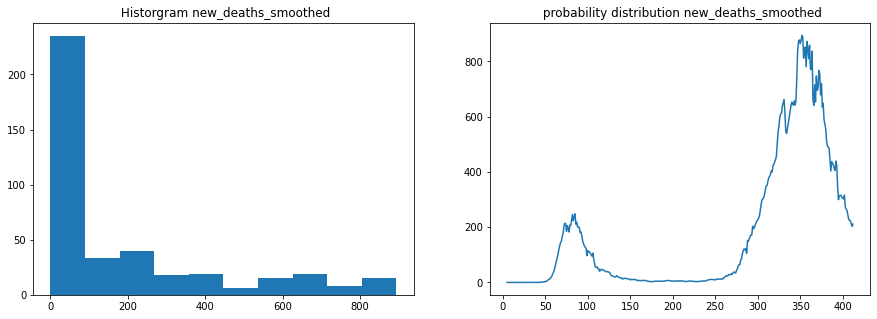

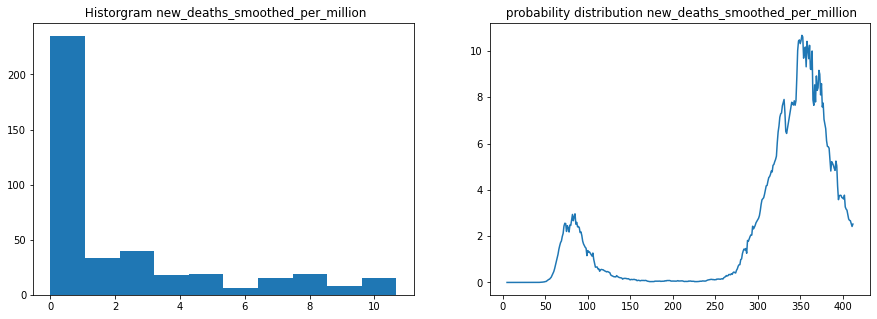

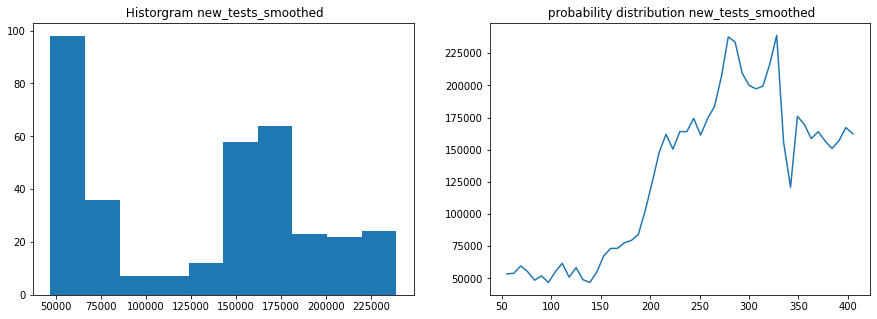

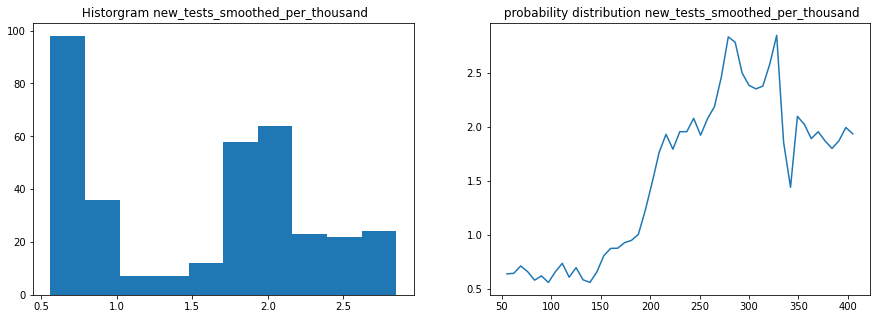

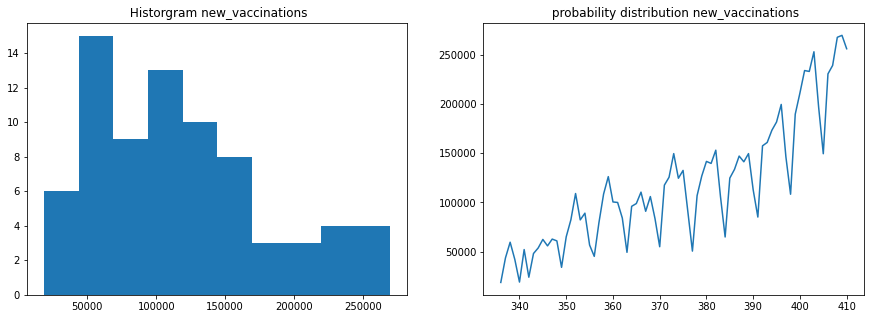

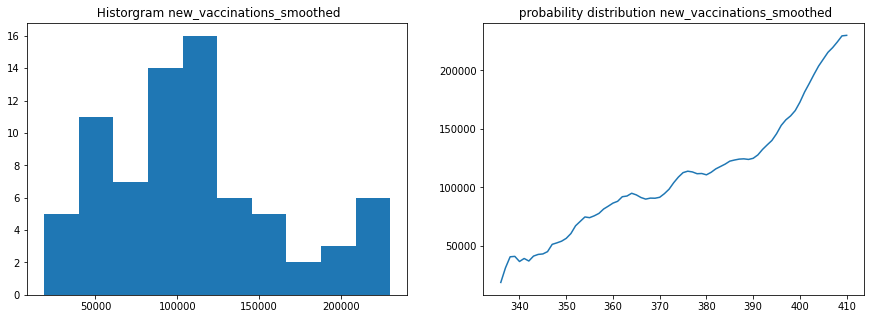

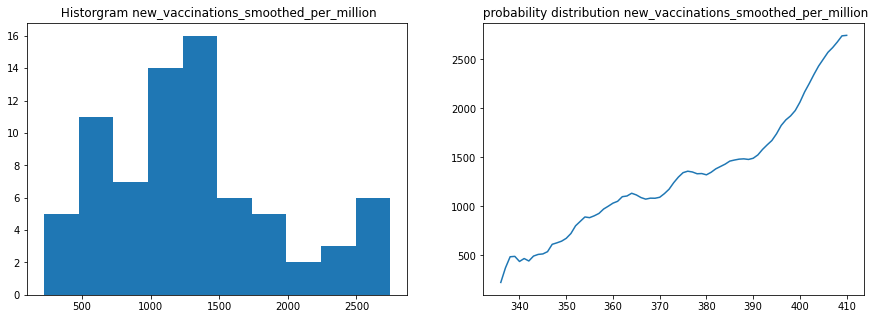

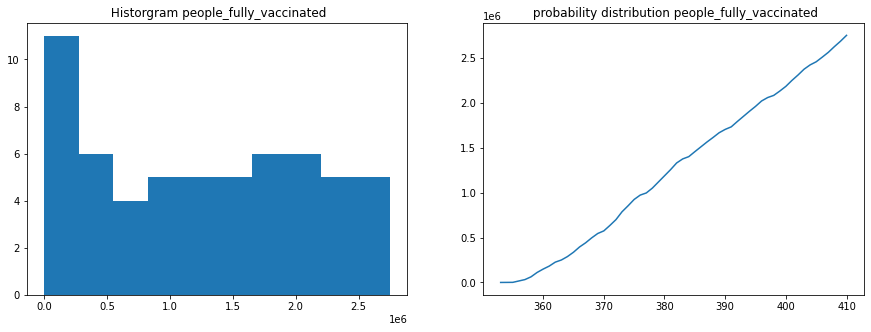

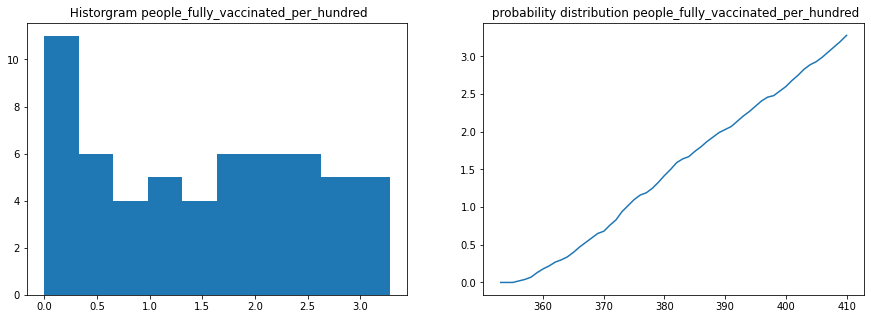

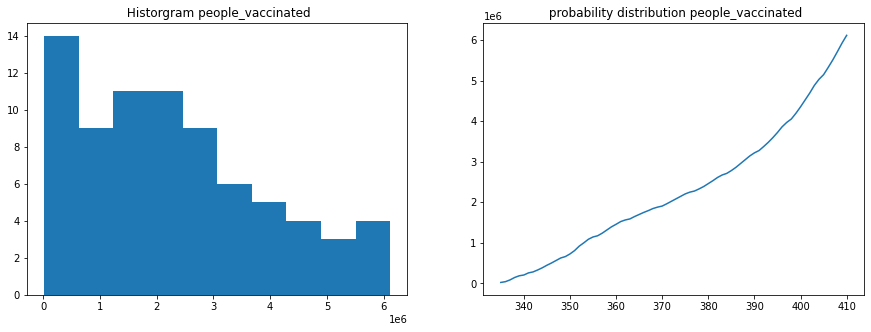

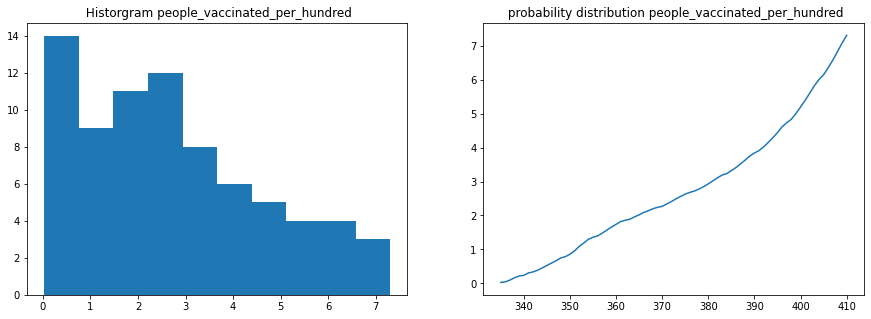

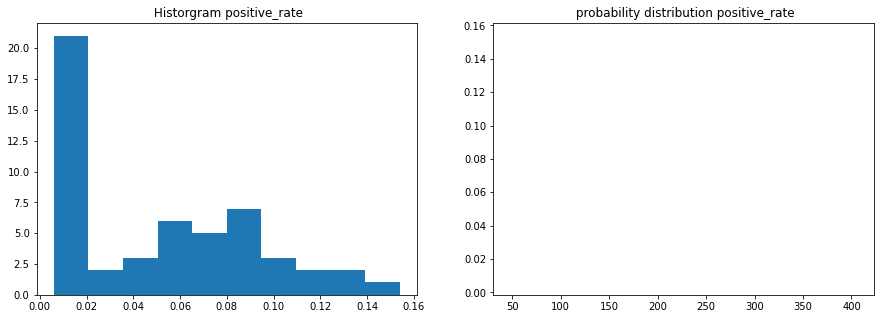

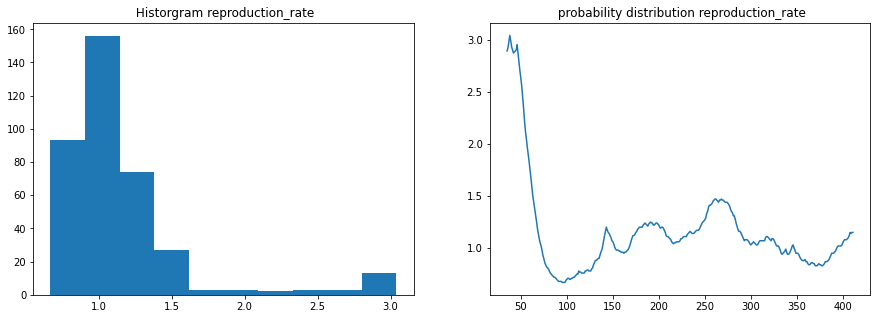

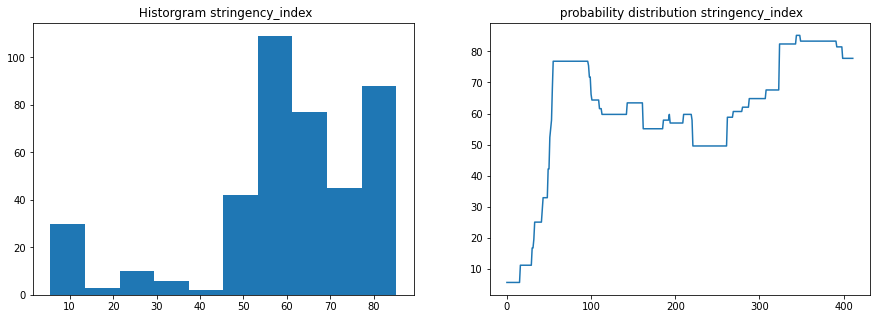

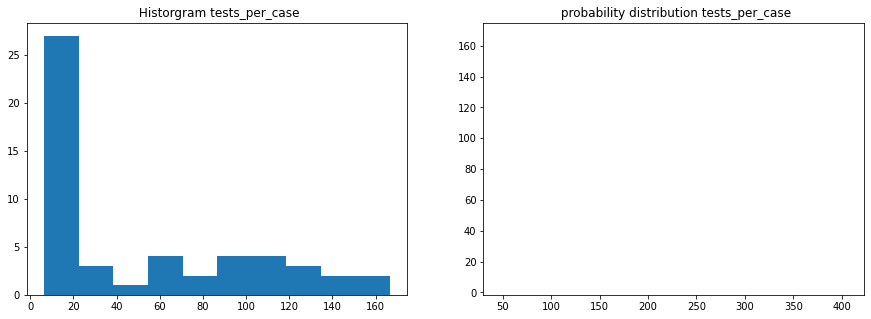

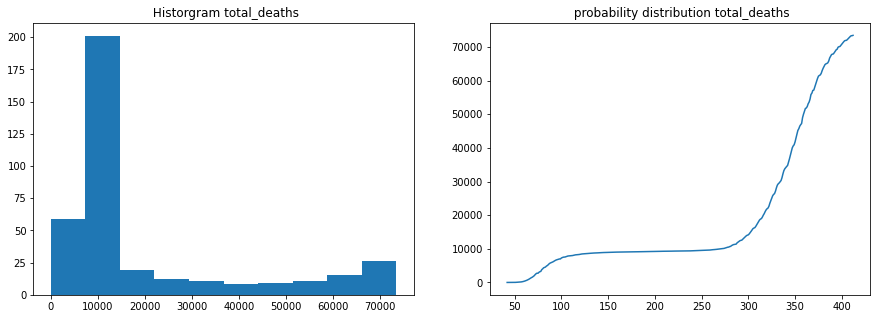

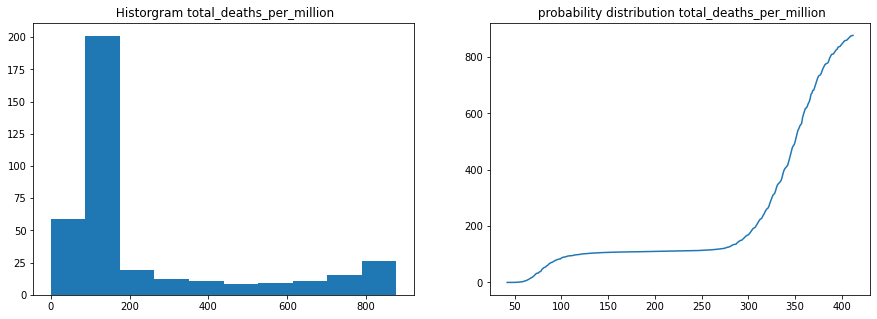

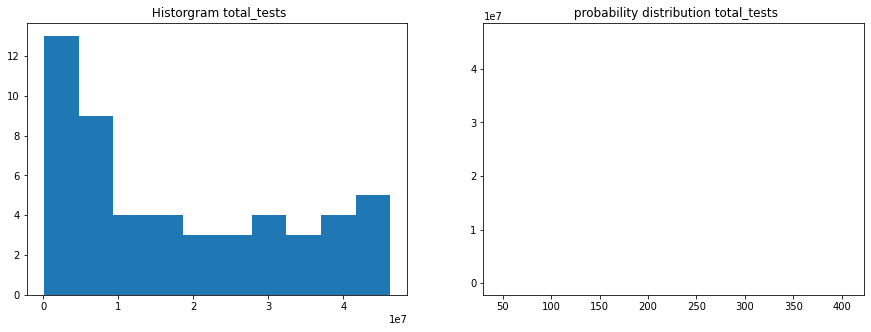

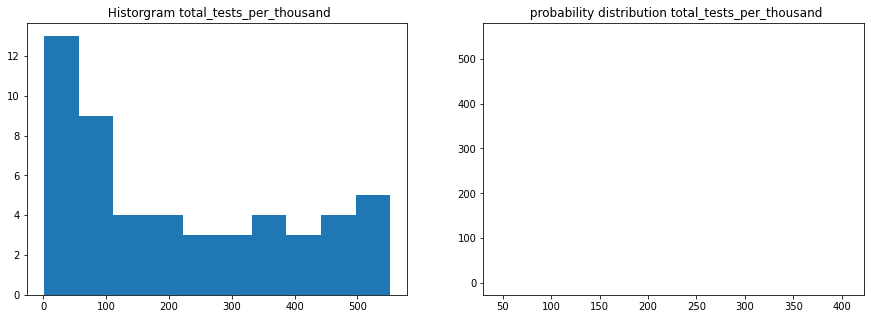

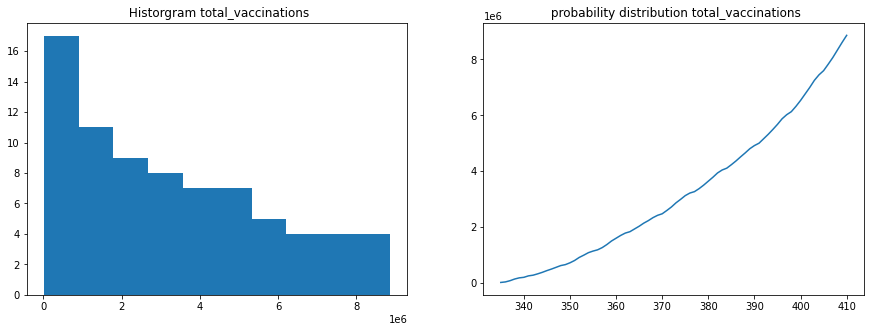

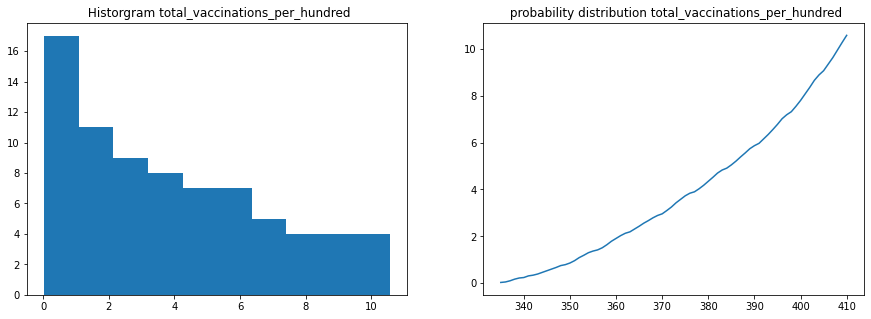

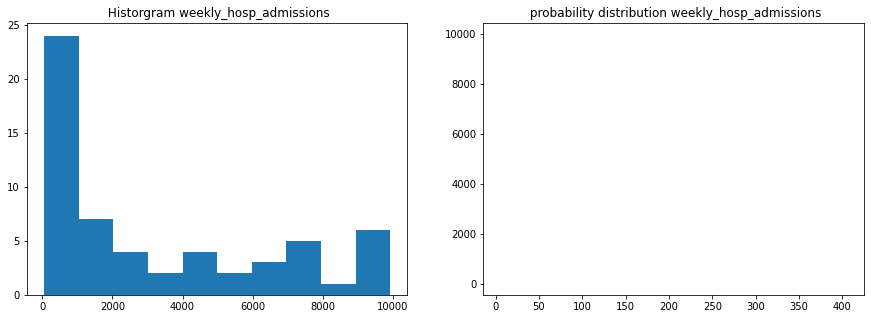

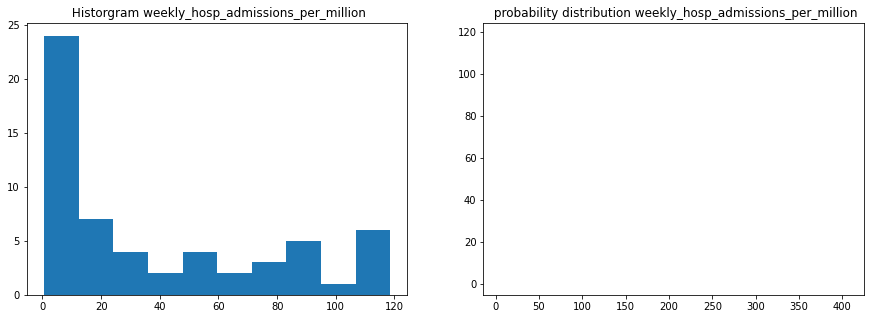

In [ ]:
# All the plots 
l.remove('tests_units')
for col in l:
    a = df_ger[col]
    fig, ((ax1, ax2 )) = plt.subplots(1,2,figsize=(15,5) )# create figure
    ax1.hist(a )
    ax1.set_title(" Historgram "+col)
    ax2.plot(a )
    ax2.set_title(" probability distribution "+col)
    
   

### According to skewnees and dirstribution we can replace the misssing values with mean and median . 



In [ ]:

for key in l:
    if  -1 < df_ger[key].skew(axis = 0, skipna = True) < 1 :
        df_ger[key].fillna(df_ger[key].mean() , inplace = True)
    else:
        df_ger[key].fillna(df_ger[key].median() , inplace = True)

In [ ]:
df_ger.isna().sum()

aged_65_older                              0
aged_70_older                              0
cardiovasc_death_rate                      0
continent                                  0
date                                       0
diabetes_prevalence                        0
extreme_poverty                          413
female_smokers                             0
gdp_per_capita                             0
handwashing_facilities                   413
hosp_patients                            413
hosp_patients_per_million                413
hospital_beds_per_thousand                 0
human_development_index                    0
icu_patients                               0
icu_patients_per_million                   0
iso_code                                   0
life_expectancy                            0
location                                   0
male_smokers                               0
median_age                                 0
new_cases                                  0
new_cases_

In [ ]:
df_ger['tests_units'].unique()

array([nan, 'tests performed'], dtype=object)

In [ ]:
df_ger['tests_units'].value_counts()

tests performed    358
Name: tests_units, dtype: int64

In [ ]:
df_num = df_ger.select_dtypes(np.number)
df_obj = df_ger.select_dtypes('object')
print(df_num.columns,'\n',df_obj.columns)

Index(['aged_65_older', 'aged_70_older', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'extreme_poverty', 'female_smokers',
       'gdp_per_capita', 'handwashing_facilities', 'hosp_patients',
       'hosp_patients_per_million', 'hospital_beds_per_thousand',
       'human_development_index', 'icu_patients', 'icu_patients_per_million',
       'life_expectancy', 'male_smokers', 'median_age', 'new_cases',
       'new_cases_per_million', 'new_cases_smoothed',
       'new_cases_smoothed_per_million', 'new_deaths',
       'new_deaths_per_million', 'new_deaths_smoothed',
       'new_deaths_smoothed_per_million', 'new_tests',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'new_vaccinations',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_vaccinated_per_hundred', 'population',
       'population_densi

###  $\color{blue}{\text{For transformations and preprocessing that will be applied per column , we need to check the distribution .  }}$
#### columns without missing value 

In [ ]:
rem = [x for x in df_num.columns if x not in l] # cols with non missing values
print(rem)

['aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'extreme_poverty', 'female_smokers', 'gdp_per_capita', 'handwashing_facilities', 'hosp_patients', 'hosp_patients_per_million', 'hospital_beds_per_thousand', 'human_development_index', 'life_expectancy', 'male_smokers', 'median_age', 'new_cases', 'new_cases_per_million', 'new_tests', 'new_tests_per_thousand', 'population', 'population_density', 'total_cases', 'total_cases_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million']


In [ ]:
df_rem= df_ger[['aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'extreme_poverty', 'female_smokers', 'gdp_per_capita', 'handwashing_facilities', 'hosp_patients', 'hosp_patients_per_million', 'hospital_beds_per_thousand', 'human_development_index', 'life_expectancy', 'male_smokers', 'median_age', 'new_cases', 'new_cases_per_million', 'new_tests', 'new_tests_per_thousand', 'population', 'population_density', 'total_cases', 'total_cases_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million']]
df_rem.drop(  ['extreme_poverty','handwashing_facilities','new_tests','new_tests_per_thousand','weekly_icu_admissions','weekly_icu_admissions_per_million', 'hosp_patients' , 'hosp_patients_per_million'] , axis=1 , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_rem.describe()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,median_age,new_cases,new_cases_per_million,population,population_density,total_cases,total_cases_per_million
count,4.130000e+02,4.130000e+02,4.130000e+02,413.00,4.130000e+02,413.000,413.0,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,413.000000,413.000000,413.0,4.130000e+02,4.130000e+02,413.000000
mean,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,6244.169492,74.527046,83783945.0,2.370160e+02,6.797313e+05,8112.906896
std,3.557023e-15,5.335534e-15,2.845618e-14,0.00,1.067107e-14,0.000,0.0,3.334709e-16,2.845618e-14,7.114045e-15,2.134214e-14,8605.289408,102.708083,0.0,5.691236e-14,8.182060e+05,9765.665151
min,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,0.000000,0.000000,83783945.0,2.370160e+02,1.000000e+00,0.012000
25%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,535.000000,6.385000,83783945.0,2.370160e+02,1.713240e+05,2044.831000
50%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,1842.000000,21.985000,83783945.0,2.370160e+02,2.312920e+05,2760.577000
75%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,9197.000000,109.770000,83783945.0,2.370160e+02,1.094678e+06,13065.486000
max,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,49044.000000,585.363000,83783945.0,2.370160e+02,2.578842e+06,30779.668000


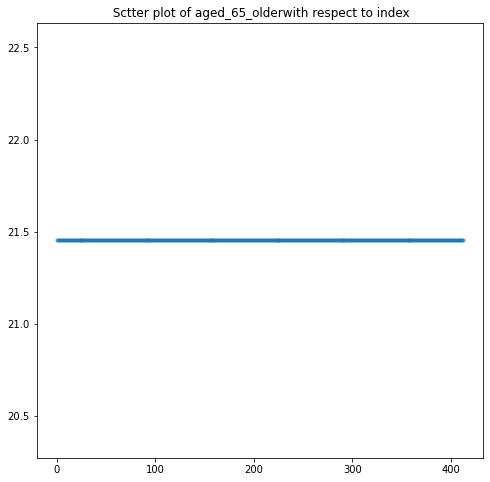

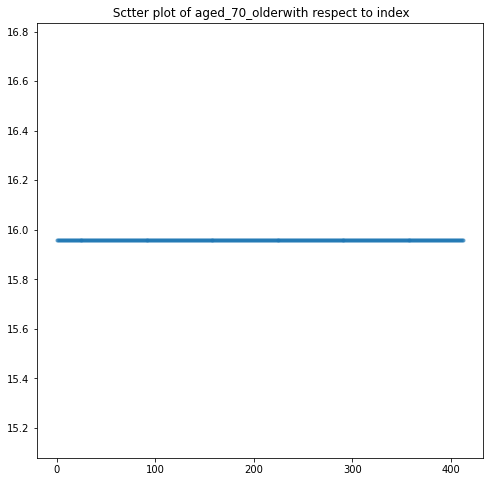

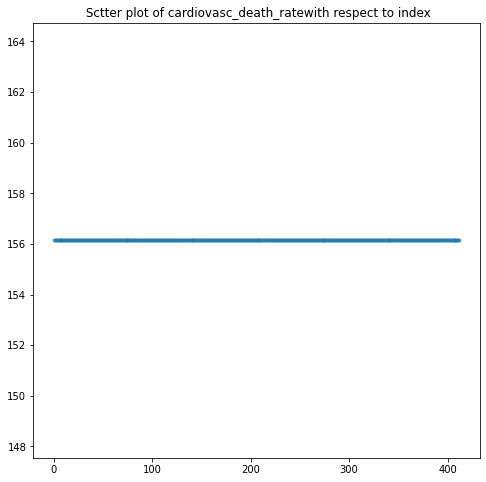

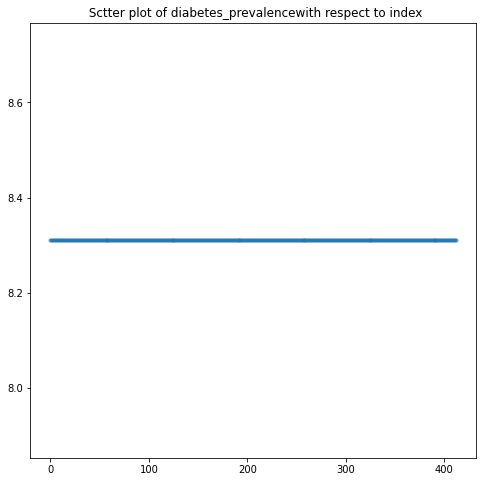

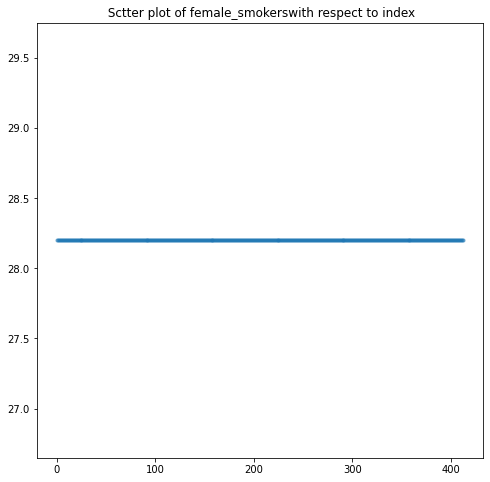

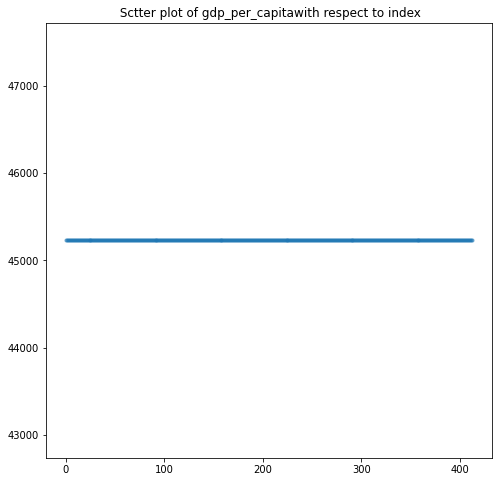

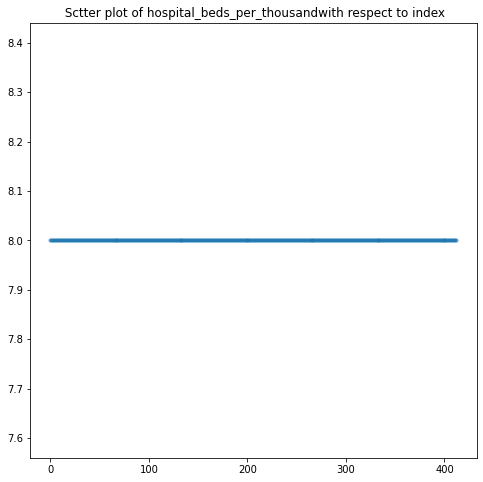

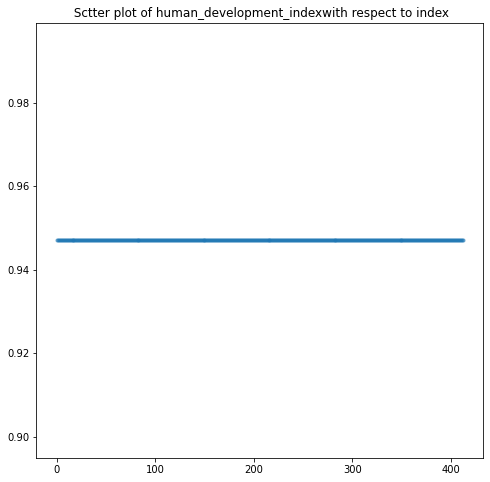

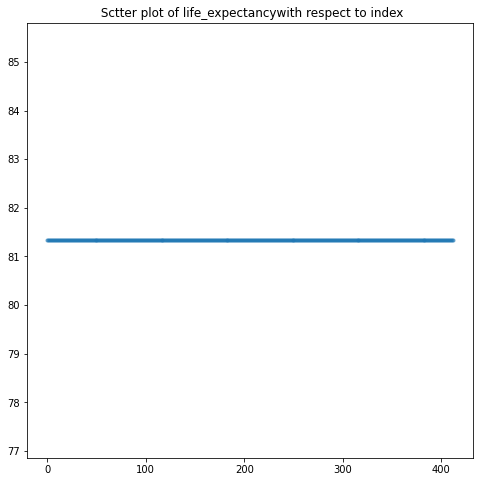

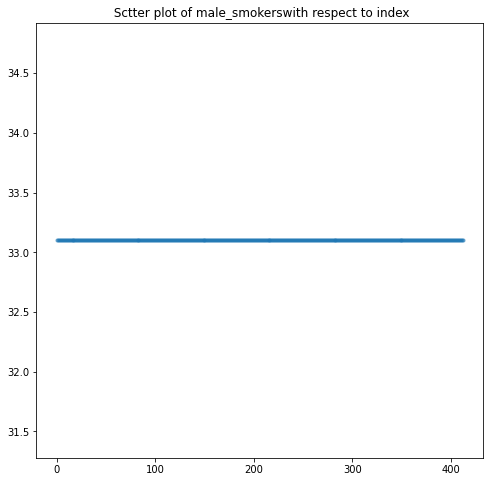

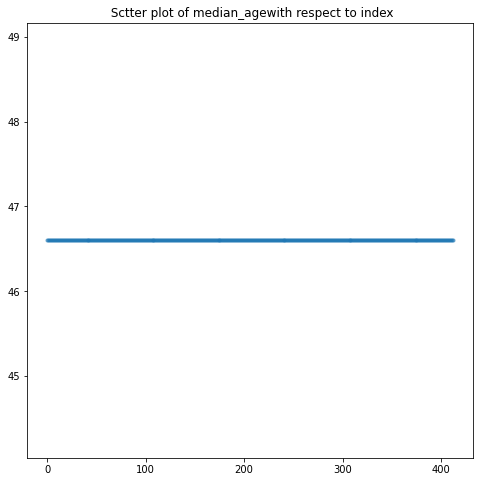

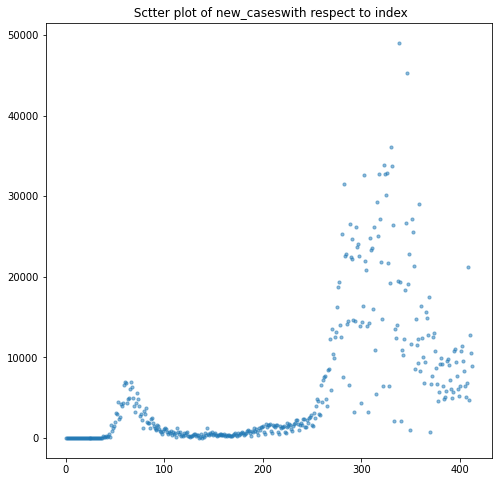

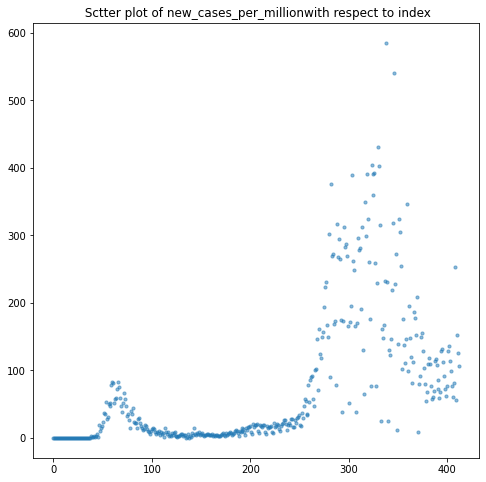

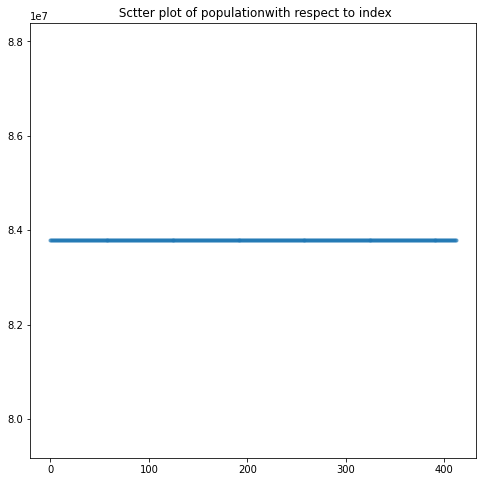

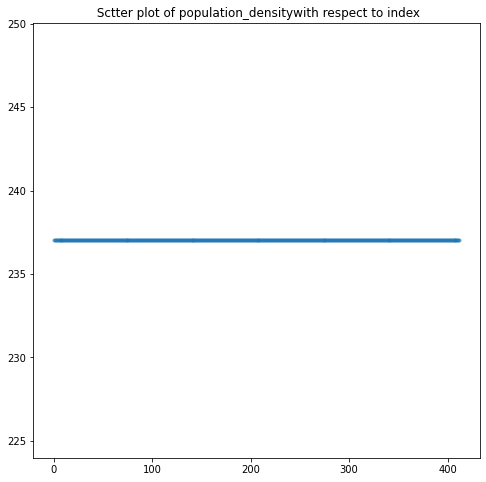

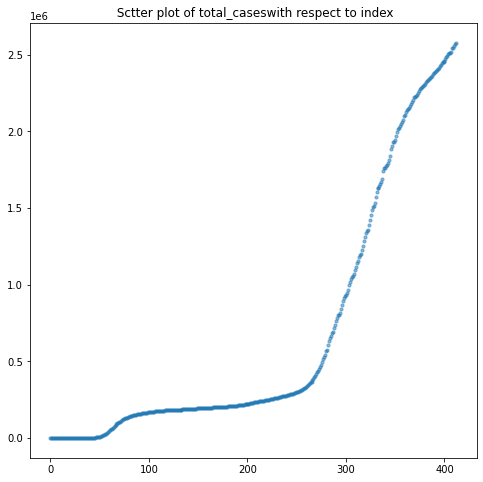

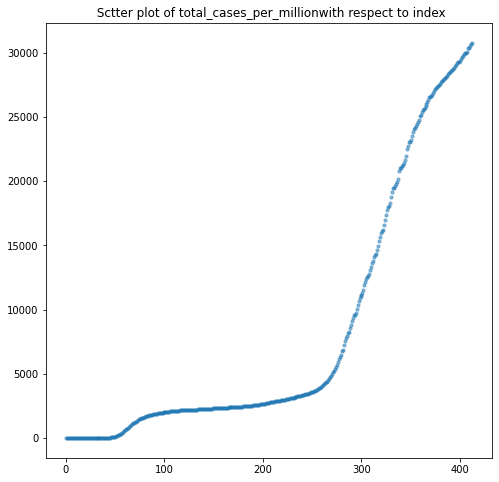

In [ ]:

for col in df_rem.columns:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(x= df_rem.index , y=df_rem[col],s=10, alpha=0.5)
    plt.title(" Sctter plot of "+col +"with respect to index")
    plt.show()
    print('\n')
    
   

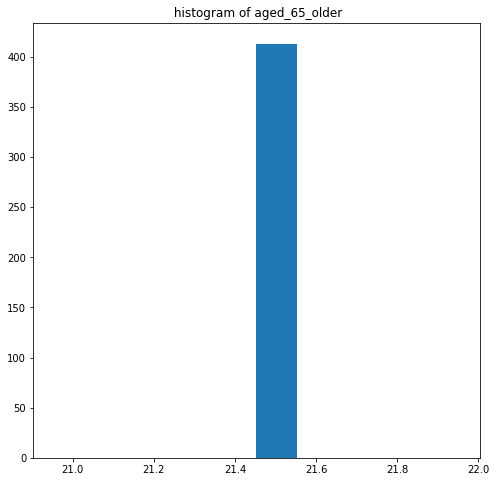

skewnees is  0




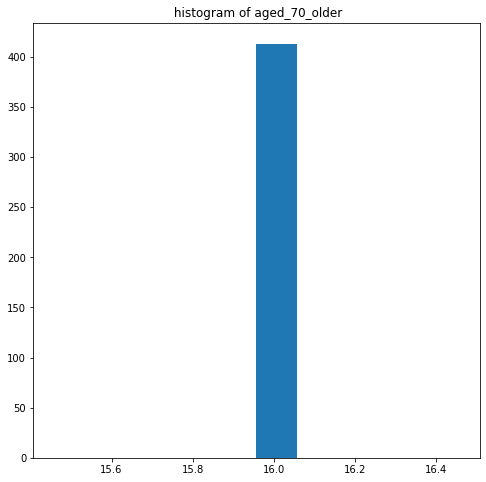

skewnees is  0




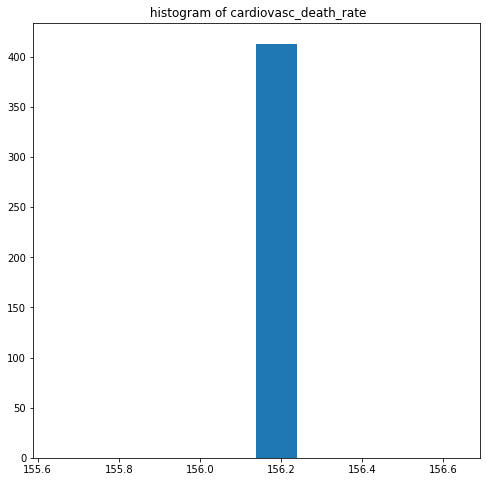

skewnees is  0




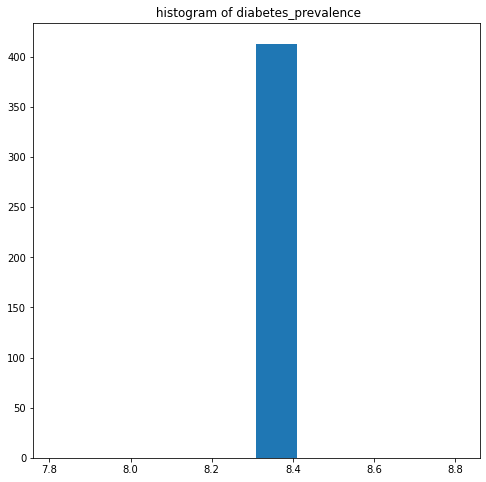

skewnees is  0




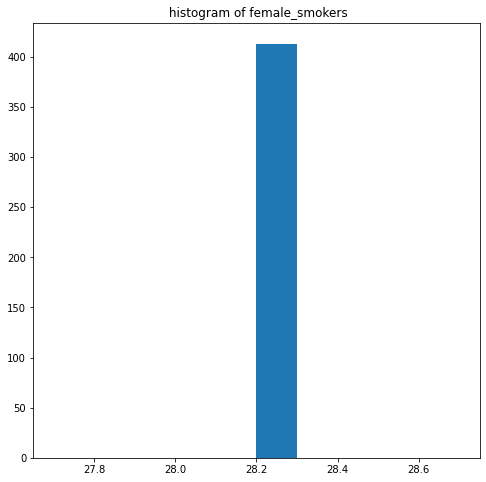

skewnees is  0




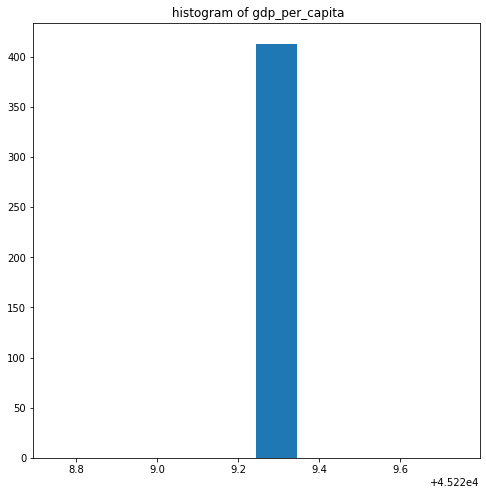

skewnees is  0




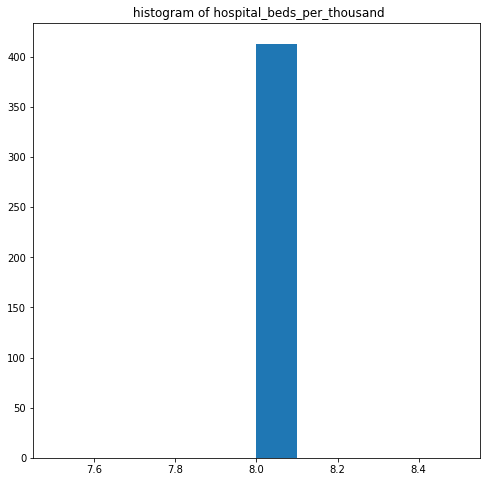

skewnees is  0




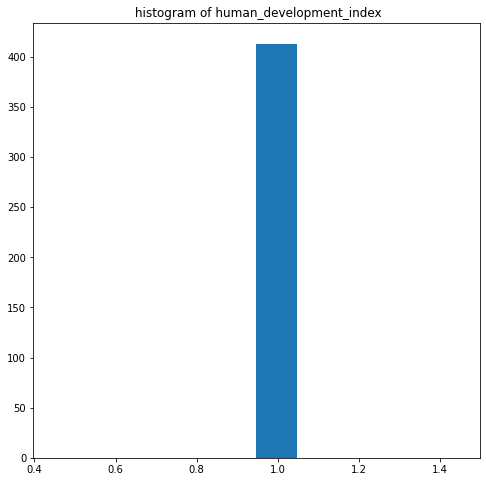

skewnees is  0




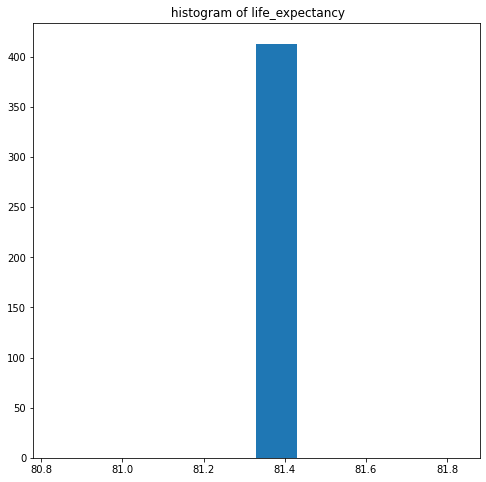

skewnees is  0




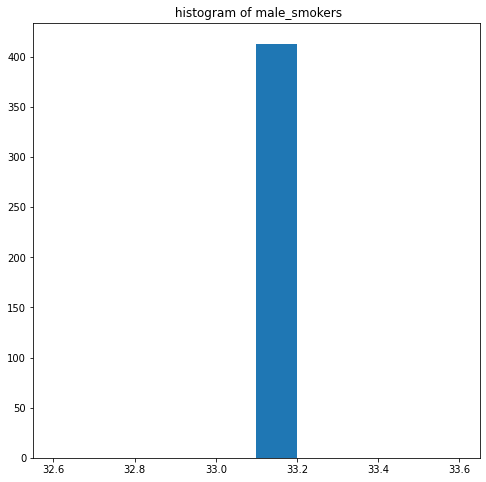

skewnees is  0




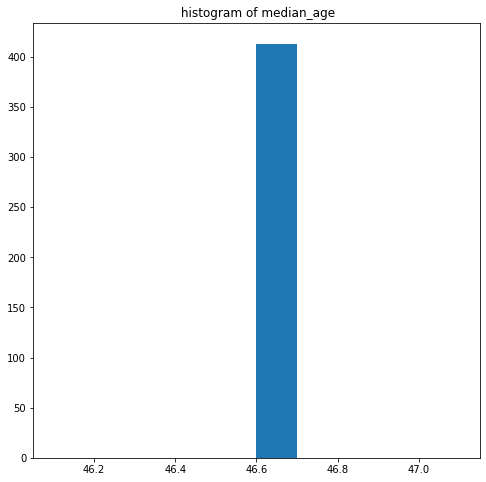

skewnees is  0




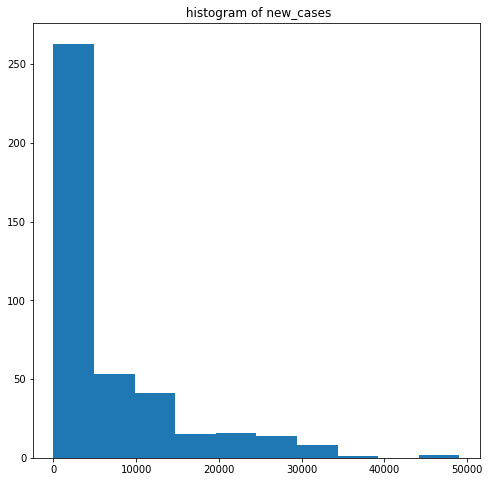

skewnees is  1.8786343774613092




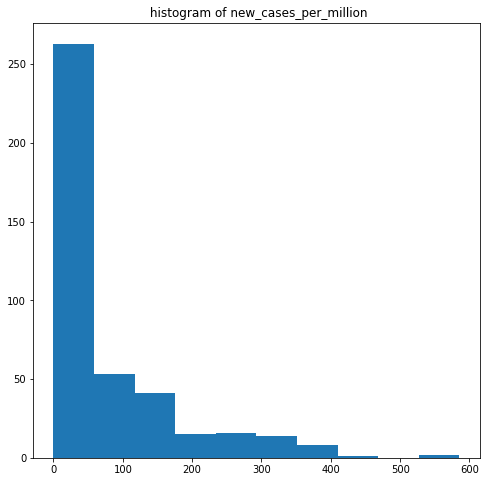

skewnees is  1.8786337364225303




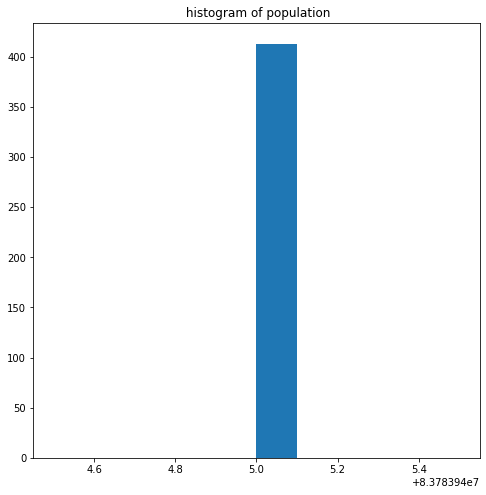

skewnees is  0




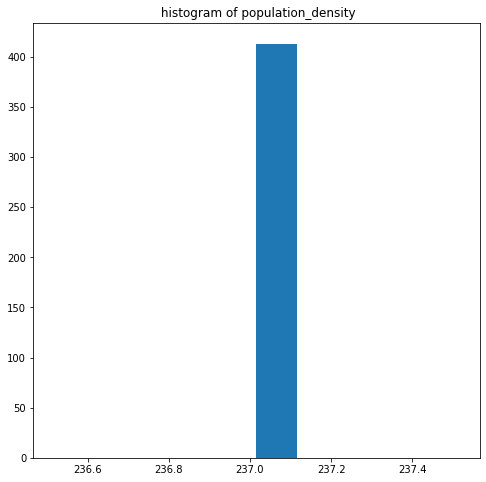

skewnees is  0




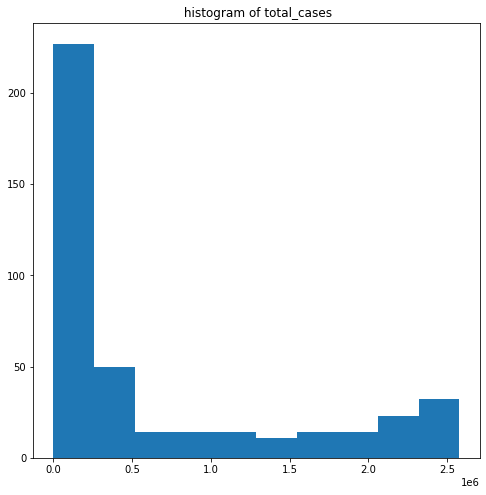

skewnees is  1.1923324655360932




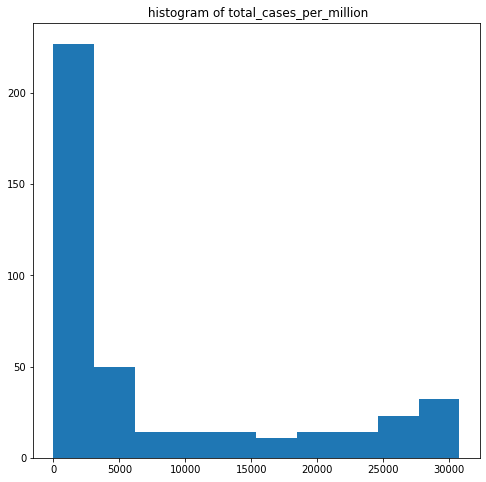

skewnees is  1.1923324599242013




In [ ]:

for col in df_rem.columns:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.hist(df_rem[col])
    plt.title(" histogram of " +col)
    plt.show()
    print("skewnees is ",df_rem[col].skew())
    print('\n')

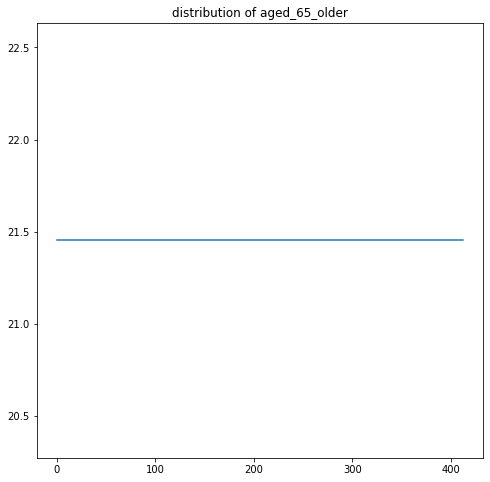

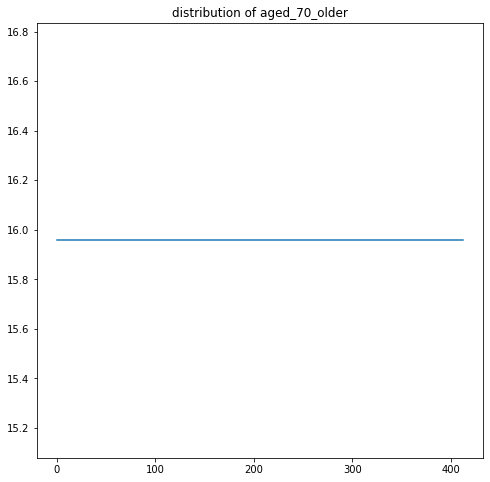

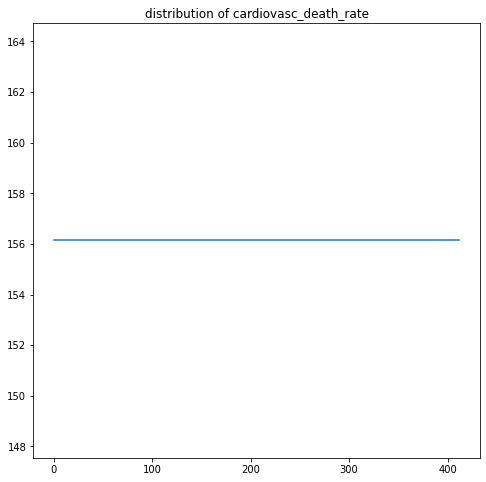

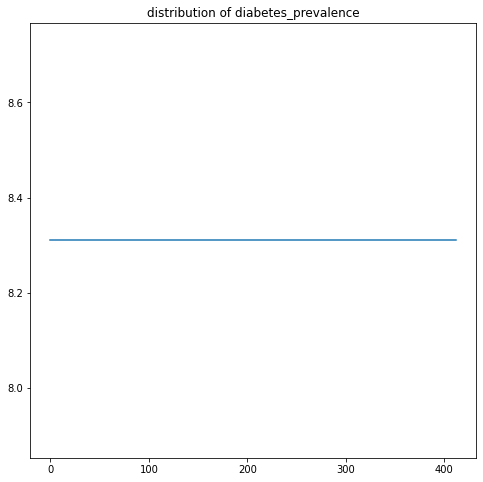

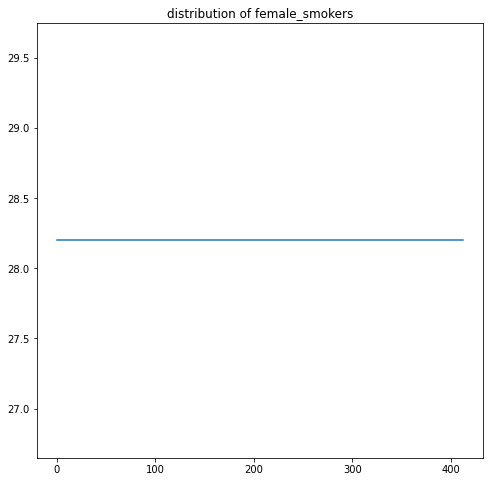

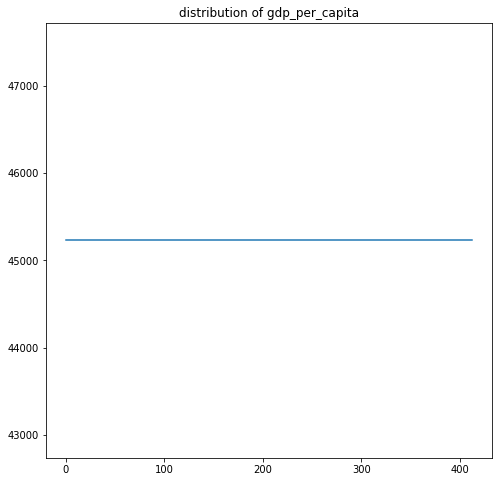

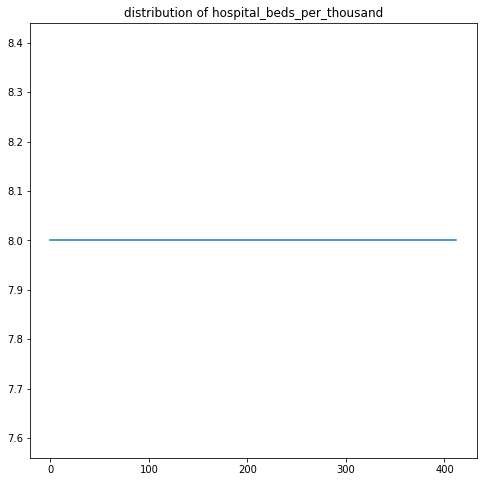

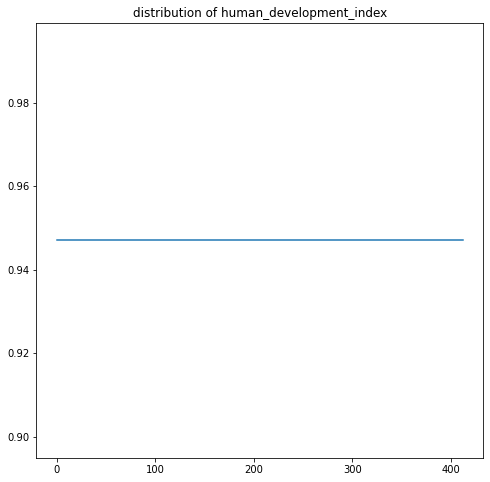

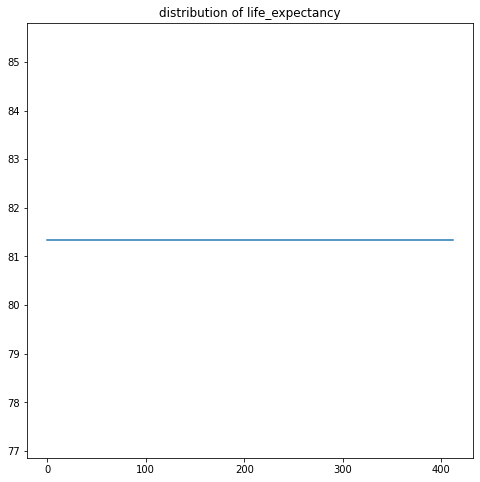

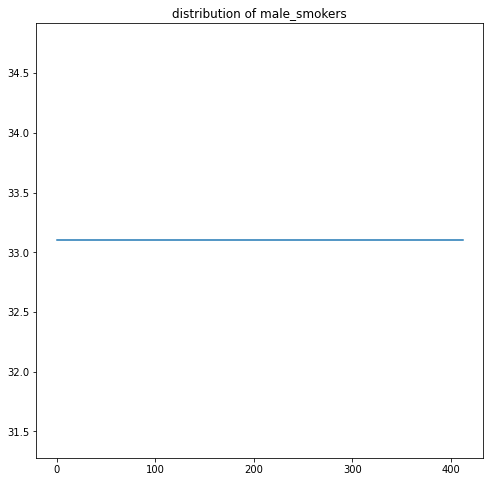

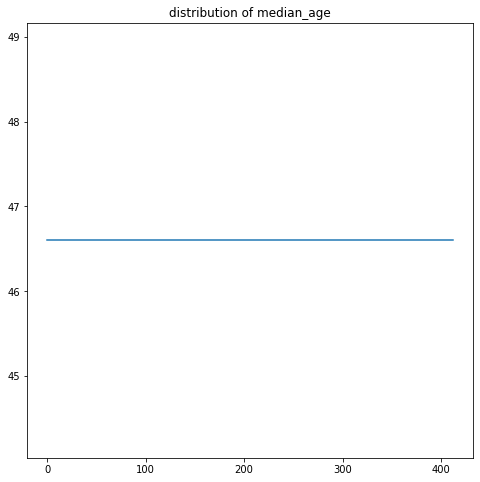

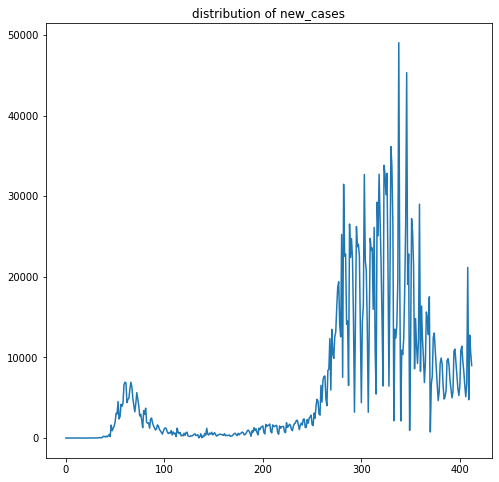

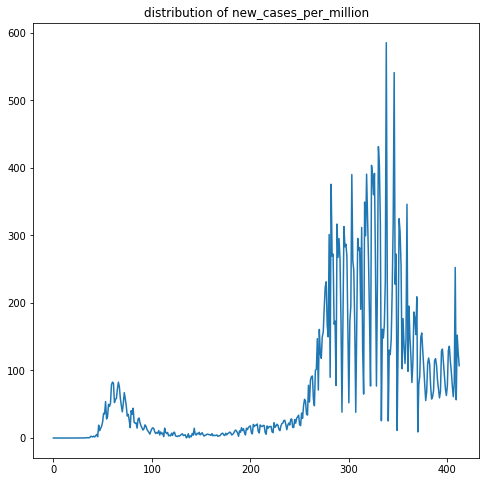

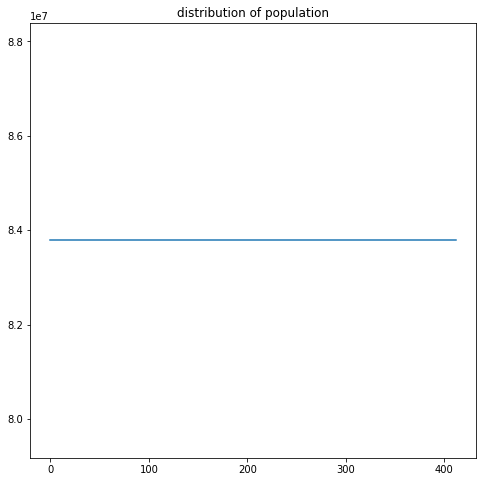

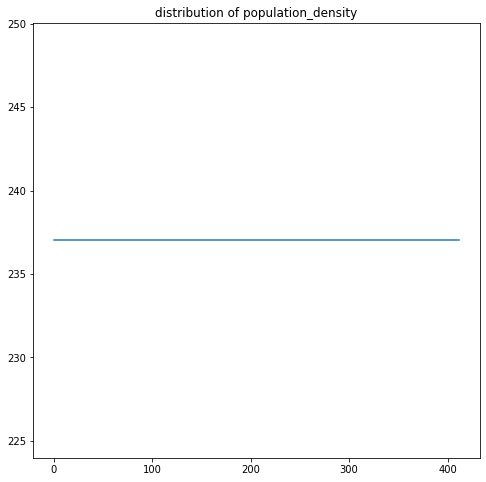

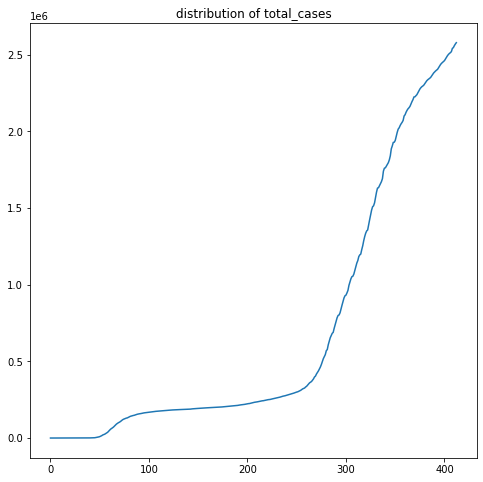

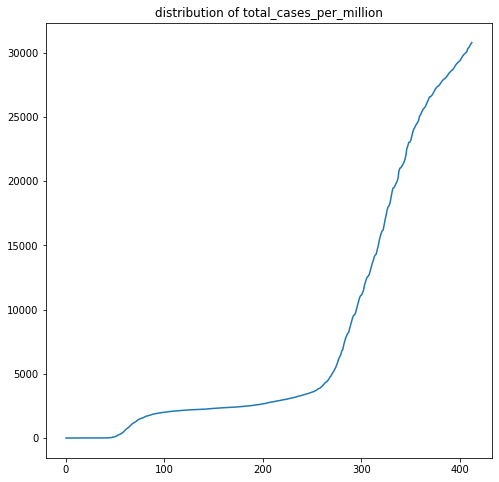

In [ ]:

for col in df_rem.columns:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(df_rem[col])
    plt.title( "distribution of " +col)
    plt.show()
    print('\n')

### For data transformation

In [ ]:
df_rem.describe()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,median_age,new_cases,new_cases_per_million,population,population_density,total_cases,total_cases_per_million
count,4.130000e+02,4.130000e+02,4.130000e+02,413.00,4.130000e+02,413.000,413.0,4.130000e+02,4.130000e+02,4.130000e+02,4.130000e+02,413.000000,413.000000,413.0,4.130000e+02,4.130000e+02,413.000000
mean,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,6244.169492,74.527046,83783945.0,2.370160e+02,6.797313e+05,8112.906896
std,3.557023e-15,5.335534e-15,2.845618e-14,0.00,1.067107e-14,0.000,0.0,3.334709e-16,2.845618e-14,7.114045e-15,2.134214e-14,8605.289408,102.708083,0.0,5.691236e-14,8.182060e+05,9765.665151
min,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,0.000000,0.000000,83783945.0,2.370160e+02,1.000000e+00,0.012000
25%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,535.000000,6.385000,83783945.0,2.370160e+02,1.713240e+05,2044.831000
50%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,1842.000000,21.985000,83783945.0,2.370160e+02,2.312920e+05,2760.577000
75%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,9197.000000,109.770000,83783945.0,2.370160e+02,1.094678e+06,13065.486000
max,2.145300e+01,1.595700e+01,1.561390e+02,8.31,2.820000e+01,45229.245,8.0,9.470000e-01,8.133000e+01,3.310000e+01,4.660000e+01,49044.000000,585.363000,83783945.0,2.370160e+02,2.578842e+06,30779.668000


#### After comparing max values of different columns  points the need of normalization or scaling . 

 we can scale the data using standardScaler while preprocessing 
 

In [ ]:
df_obj.describe()

,continent,date,iso_code,location,tests_units
count,413,413,413,413,358
unique,1,413,1,1,1
top,Europe,2020-12-21,DEU,Germany,tests performed
freq,413,1,413,413,358


In [ ]:
df_num.describe()

,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,hosp_patients,hosp_patients_per_million,...,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,total_vaccinations_per_hundred,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million
count,4.130000e+02,4.130000e+02,4.130000e+02,413.00,0.0,4.130000e+02,413.000,0.0,0.0,0.0,...,413.000000,413.000000,4.130000e+02,413.000000,4.130000e+02,413.000000,413.000000,413.000000,0.0,0.0
mean,2.145300e+01,1.595700e+01,1.561390e+02,8.31,NaN,2.820000e+01,45229.245,NaN,NaN,NaN,...,18384.808717,219.431174,1.816980e+07,216.864923,3.267099e+06,3.899474,3281.311345,39.163948,NaN,NaN
std,3.557023e-15,5.335534e-15,2.845618e-14,0.00,NaN,1.067107e-14,0.000,NaN,NaN,NaN,...,19962.195957,238.258001,5.241114e+06,62.555121,1.081738e+06,1.291197,1197.826215,14.296607,NaN,NaN
min,2.145300e+01,1.595700e+01,1.561390e+02,8.31,NaN,2.820000e+01,45229.245,NaN,NaN,NaN,...,2.000000,0.024000,1.280080e+05,1.528000,2.125700e+04,0.030000,50.371000,0.601000,NaN,NaN
25%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,NaN,2.820000e+01,45229.245,NaN,NaN,NaN,...,8895.000000,106.166000,1.816980e+07,216.864923,3.267099e+06,3.899474,3281.311345,39.163948,NaN,NaN
50%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,NaN,2.820000e+01,45229.245,NaN,NaN,NaN,...,9345.000000,111.537000,1.816980e+07,216.864923,3.267099e+06,3.899474,3281.311345,39.163948,NaN,NaN
75%,2.145300e+01,1.595700e+01,1.561390e+02,8.31,NaN,2.820000e+01,45229.245,NaN,NaN,NaN,...,17177.000000,205.015000,1.816980e+07,216.864923,3.267099e+06,3.899474,3281.311345,39.163948,NaN,NaN
max,2.145300e+01,1.595700e+01,1.561390e+02,8.31,NaN,2.820000e+01,45229.245,NaN,NaN,NaN,...,73463.000000,876.815000,4.625274e+07,552.048000,8.863270e+06,10.580000,9930.155000,118.521000,NaN,NaN


##### For skewness

In [ ]:
df_ger.skew()

aged_65_older                            0.000000
aged_70_older                            0.000000
cardiovasc_death_rate                    0.000000
diabetes_prevalence                      0.000000
extreme_poverty                               NaN
female_smokers                           0.000000
gdp_per_capita                           0.000000
handwashing_facilities                        NaN
hosp_patients                                 NaN
hosp_patients_per_million                     NaN
hospital_beds_per_thousand               0.000000
human_development_index                  0.000000
icu_patients                             0.849796
icu_patients_per_million                 0.849796
life_expectancy                          0.000000
male_smokers                             0.000000
median_age                               0.000000
new_cases                                1.878634
new_cases_per_million                    1.878634
new_cases_smoothed                       1.075235


In [ ]:
df_ger_log = np.log(df_num.astype(float)) #helps reduce the effect of  outliers too 
#doubt
#should i apply log transformation to skewed cols or all 
# is there a need of scaling after log transform , if yes , which should we perform first.


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [ ]:
df_ger_log.skew()

aged_65_older                            0.000000
aged_70_older                            0.000000
cardiovasc_death_rate                    0.000000
diabetes_prevalence                      0.000000
extreme_poverty                               NaN
female_smokers                           0.000000
gdp_per_capita                           0.000000
handwashing_facilities                        NaN
hosp_patients                                 NaN
hosp_patients_per_million                     NaN
hospital_beds_per_thousand               0.000000
human_development_index                  0.000000
icu_patients                            -0.286971
icu_patients_per_million                -0.286976
life_expectancy                          0.000000
male_smokers                             0.000000
median_age                               0.000000
new_cases                                     NaN
new_cases_per_million                         NaN
new_cases_smoothed                            NaN


In [ ]:
df_ger_sqrt = np.cbrt(df_num)
df_ger_sqrt.skew()

aged_65_older                            0.000000
aged_70_older                            0.000000
cardiovasc_death_rate                    0.000000
diabetes_prevalence                      0.000000
extreme_poverty                               NaN
female_smokers                           0.000000
gdp_per_capita                           0.000000
handwashing_facilities                        NaN
hosp_patients                                 NaN
hosp_patients_per_million                     NaN
hospital_beds_per_thousand               0.000000
human_development_index                  0.000000
icu_patients                             0.290219
icu_patients_per_million                 0.290216
life_expectancy                          0.000000
male_smokers                             0.000000
median_age                               0.000000
new_cases                                0.361813
new_cases_per_million                    0.361851
new_cases_smoothed                       0.179368


Text(0.5, 1.0, 'After Cube root  transform')

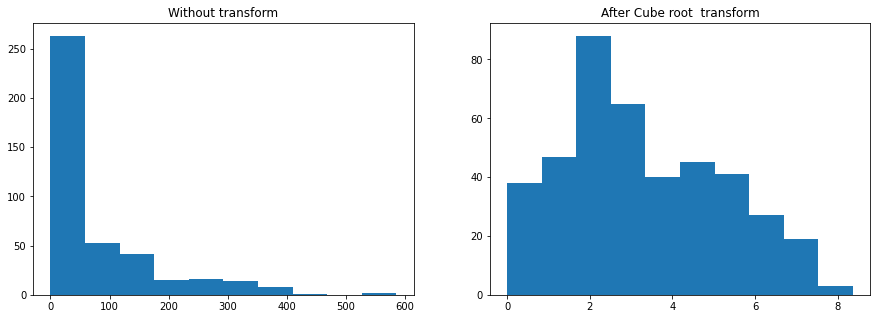

In [ ]:
#df_ger_log.replace(-np.inf, np.nan , inplace = True) 
fig, ((ax1, ax2 )) = plt.subplots(1,2,figsize=(15,5) )
ax1.hist(df_ger['new_cases_per_million'])
#ax2.hist(df_ger_log['new_cases_per_million'])
ax2.hist(df_ger_sqrt['new_cases_per_million'])
ax1.set_title("Without transform")
#ax2.set_title("log transform")
ax2.set_title("After Cube root  transform")

better ? check after training the model. 


#### Colinearity check  and feature reducton

In [ ]:
df_num.drop(['extreme_poverty', 'handwashing_facilities', 'hosp_patients', 'hosp_patients_per_million', 'new_tests', 'new_tests_per_thousand', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million'],axis=1,inplace=True)


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_num.columns

Index(['aged_65_older', 'aged_70_older', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'gdp_per_capita',
       'hospital_beds_per_thousand', 'human_development_index', 'icu_patients',
       'icu_patients_per_million', 'life_expectancy', 'male_smokers',
       'median_age', 'new_cases', 'new_cases_per_million',
       'new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_deaths',
       'new_deaths_per_million', 'new_deaths_smoothed',
       'new_deaths_smoothed_per_million', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'new_vaccinations',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_vaccinated_per_hundred', 'population',
       'population_density', 'positive_rate', 'reproduction_rate',
       'stringency_index', 'tests_per_case', 'total_cases',
       'total_cases_per_million', 'total_deaths'

In [ ]:
# age 
corr_matrix = df_num[['aged_65_older', 'aged_70_older']].corr()
corr_matrix


,aged_65_older,aged_70_older
aged_65_older,1.0,1.0
aged_70_older,1.0,1.0


In [ ]:
df_num[['aged_65_older', 'aged_70_older']].value_counts()

aged_65_older  aged_70_older
21.453         15.957           413
dtype: int64

In [ ]:
df_num.drop(['aged_65_older', 'aged_70_older'],axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# new cases 
corr_matrix = df_num[['new_cases','new_cases_per_million', 'new_cases_smoothed','new_cases_smoothed_per_million']].corr()
corr_matrix

,new_cases,new_cases_per_million,new_cases_smoothed,new_cases_smoothed_per_million
new_cases,1.000000,1.000000,0.859657,0.859657
new_cases_per_million,1.000000,1.000000,0.859657,0.859657
new_cases_smoothed,0.859657,0.859657,1.000000,1.000000
new_cases_smoothed_per_million,0.859657,0.859657,1.000000,1.000000


In [ ]:
df_num.drop([ 'new_cases_smoothed'] , axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# new deaths
corr_matrix = df_num[['new_deaths','new_deaths_per_million','new_deaths_smoothed','new_deaths_smoothed_per_million']].corr()
corr_matrix

,new_deaths,new_deaths_per_million,new_deaths_smoothed,new_deaths_smoothed_per_million
new_deaths,1.000000,1.000000,0.866254,0.866248
new_deaths_per_million,1.000000,1.000000,0.866252,0.866246
new_deaths_smoothed,0.866254,0.866252,1.000000,1.000000
new_deaths_smoothed_per_million,0.866248,0.866246,1.000000,1.000000


In [ ]:
df_num.drop(['new_deaths_per_million','new_deaths_smoothed_per_million'] , axis =1 , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# polpulation
corr_matrix = df_num[['population', 'population_density']].corr()
corr_matrix


,population,population_density
population,NaN,NaN
population_density,NaN,1.0


In [ ]:
df_num[['population', 'population_density']].value_counts()

population  population_density
83783945.0  237.016               413
dtype: int64

In [ ]:
df_num.drop(['population', 'population_density'], axis =1 , inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#  total test
corr_matrix = df_num[[ 'total_cases', 'total_cases_per_million']].corr()
corr_matrix

,total_cases,total_cases_per_million
total_cases,1.0,1.0
total_cases_per_million,1.0,1.0


In [ ]:
df_num.drop([ 'total_cases_per_million'] , axis=1 , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:

#  total death
corr_matrix = df_num[['total_deaths', 'total_deaths_per_million' ]].corr()
corr_matrix

,total_deaths,total_deaths_per_million
total_deaths,1.0,1.0
total_deaths_per_million,1.0,1.0


In [ ]:
df_num.drop(['total_deaths_per_million'] , axis = 1 , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#  total tests
corr_matrix = df_num[['total_tests', 'total_tests_per_thousand' ]].corr()
corr_matrix

,total_tests,total_tests_per_thousand
total_tests,1.0,1.0
total_tests_per_thousand,1.0,1.0


In [ ]:
df_num.drop(['total_tests_per_thousand'] , axis = 1 , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_num.columns

Index(['cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'gdp_per_capita', 'hospital_beds_per_thousand',
       'human_development_index', 'icu_patients', 'icu_patients_per_million',
       'life_expectancy', 'male_smokers', 'median_age', 'new_cases',
       'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'people_vaccinated',
       'people_vaccinated_per_hundred', 'positive_rate', 'reproduction_rate',
       'stringency_index', 'tests_per_case', 'total_cases', 'total_deaths',
       'total_tests', 'total_vaccinations', 'total_vaccinations_per_hundred',
       'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'],
      dtype='object')

In [ ]:
df_num[['cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers','gdp_per_capita']].value_counts()

cardiovasc_death_rate  diabetes_prevalence  female_smokers  gdp_per_capita
156.139                8.31                 28.2            45229.245         413
dtype: int64

In [ ]:
df_num.drop(['cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers','gdp_per_capita'] , axis =1 , inplace= True)

In [ ]:
df_num.drop(['human_development_index', 'median_age'],axis=1,inplace=True)

In [ ]:
corr_matrix = df_num[['icu_patients', 'icu_patients_per_million']].corr()
corr_matrix

,icu_patients,icu_patients_per_million
icu_patients,1.0,1.0
icu_patients_per_million,1.0,1.0


In [ ]:
df_num.drop(['icu_patients_per_million'],axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_num.columns

Index(['hospital_beds_per_thousand', 'icu_patients', 'life_expectancy',
       'male_smokers', 'new_cases', 'new_cases_smoothed', 'new_deaths',
       'new_deaths_smoothed', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'new_vaccinations',
       'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_vaccinated_per_hundred', 'positive_rate',
       'reproduction_rate', 'stringency_index', 'tests_per_case',
       'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [ ]:
df_num.drop(['life_expectancy', 'male_smokers'] , axis=1,inplace=True)

In [ ]:
df_num.columns

Index(['hospital_beds_per_thousand', 'icu_patients', 'new_cases',
       'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'people_vaccinated',
       'people_vaccinated_per_hundred', 'positive_rate', 'reproduction_rate',
       'stringency_index', 'tests_per_case', 'total_cases', 'total_deaths',
       'total_tests', 'total_vaccinations', 'total_vaccinations_per_hundred',
       'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'],
      dtype='object')

In [ ]:
corr_matrix = df_num[['new_tests_smoothed', 'new_tests_smoothed_per_thousand']].corr()
corr_matrix

,new_tests_smoothed,new_tests_smoothed_per_thousand
new_tests_smoothed,1.0,1.0
new_tests_smoothed_per_thousand,1.0,1.0


In [ ]:
df_num.drop(['new_tests_smoothed', 'new_tests_smoothed_per_thousand'],axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_num.columns

Index(['hospital_beds_per_thousand', 'icu_patients', 'new_cases',
       'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'people_vaccinated',
       'people_vaccinated_per_hundred', 'positive_rate', 'reproduction_rate',
       'stringency_index', 'tests_per_case', 'total_cases', 'total_deaths',
       'total_tests', 'total_vaccinations', 'total_vaccinations_per_hundred',
       'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'],
      dtype='object')

In [ ]:
corr_matrix = df_num[['new_vaccinations', 'new_vaccinations_smoothed','new_vaccinations_smoothed_per_million', 'people_fully_vaccinated','people_fully_vaccinated_per_hundred' ]].corr()
corr_matrix

,new_vaccinations,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,people_fully_vaccinated,people_fully_vaccinated_per_hundred
new_vaccinations,1.000000,0.910526,0.910529,0.669254,0.669016
new_vaccinations_smoothed,0.910526,1.000000,1.000000,0.698023,0.697809
new_vaccinations_smoothed_per_million,0.910529,1.000000,1.000000,0.698107,0.697894
people_fully_vaccinated,0.669254,0.698023,0.698107,1.000000,0.999996
people_fully_vaccinated_per_hundred,0.669016,0.697809,0.697894,0.999996,1.000000


In [ ]:
df_num.drop('new_vaccinations_smoothed_per_million',axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_num.columns

Index(['hospital_beds_per_thousand', 'icu_patients', 'new_cases',
       'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_vaccinated_per_hundred', 'positive_rate',
       'reproduction_rate', 'stringency_index', 'tests_per_case',
       'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [ ]:
corr_matrix = df_num[['people_vaccinated','people_vaccinated_per_hundred']].corr()
corr_matrix

,people_vaccinated,people_vaccinated_per_hundred
people_vaccinated,1.000000,0.999999
people_vaccinated_per_hundred,0.999999,1.000000


In [ ]:
corr_matrix = df_num[['total_vaccinations', 'total_vaccinations_per_hundred','weekly_hosp_admissions', 'weekly_hosp_admissions_per_million']].corr()
corr_matrix

,total_vaccinations,total_vaccinations_per_hundred,weekly_hosp_admissions,weekly_hosp_admissions_per_million
total_vaccinations,1.000000,0.999999,-0.102467,-0.102467
total_vaccinations_per_hundred,0.999999,1.000000,-0.102389,-0.102389
weekly_hosp_admissions,-0.102467,-0.102389,1.000000,1.000000
weekly_hosp_admissions_per_million,-0.102467,-0.102389,1.000000,1.000000


In [ ]:
df_num.drop('weekly_hosp_admissions_per_million' , axis=1 , inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_num.columns
df_num.corr()

,hospital_beds_per_thousand,icu_patients,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_vaccinations,new_vaccinations_smoothed,people_fully_vaccinated,people_fully_vaccinated_per_hundred,...,positive_rate,reproduction_rate,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,total_vaccinations,total_vaccinations_per_hundred,weekly_hosp_admissions
hospital_beds_per_thousand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
icu_patients,NaN,1.000000,0.688874,0.834882,0.764236,0.839138,-0.312203,-0.355936,-0.267296,-0.267384,...,0.351838,-0.163043,0.389366,-0.275381,0.597457,0.418765,0.233961,-0.380227,-0.380194,0.275102
new_cases,NaN,0.688874,1.000000,0.859657,0.679499,0.611777,-0.096239,-0.167539,-0.070630,-0.070640,...,0.124529,-0.081904,0.436382,-0.107300,0.550045,0.360298,0.109360,-0.173464,-0.173469,0.127961
new_cases_smoothed,NaN,0.834882,0.859657,1.000000,0.674769,0.750589,-0.183838,-0.210879,-0.127031,-0.127089,...,0.315433,-0.142115,0.515485,-0.240249,0.659361,0.439111,0.265249,-0.228402,-0.228390,0.324431
new_deaths,NaN,0.764236,0.679499,0.674769,1.000000,0.866254,-0.170608,-0.305953,-0.266534,-0.266542,...,0.118500,-0.242297,0.516126,-0.083423,0.702146,0.586439,0.074606,-0.312126,-0.312150,0.087505
new_deaths_smoothed,NaN,0.839138,0.611777,0.750589,0.866254,1.000000,-0.272378,-0.297813,-0.318879,-0.318904,...,0.291748,-0.310816,0.635052,-0.221026,0.838737,0.716461,0.280756,-0.319032,-0.319069,0.211761
new_vaccinations,NaN,-0.312203,-0.096239,-0.183838,-0.170608,-0.272378,1.000000,0.910526,0.669254,0.669016,...,-0.170880,0.051094,-0.035039,0.109914,0.105585,0.228000,-0.184630,0.889728,0.889772,-0.092494
new_vaccinations_smoothed,NaN,-0.355936,-0.167539,-0.210879,-0.305953,-0.297813,0.910526,1.000000,0.698023,0.697809,...,-0.094278,0.049128,-0.036415,0.011220,0.117968,0.254108,0.027015,0.973448,0.973450,-0.078633
people_fully_vaccinated,NaN,-0.267296,-0.070630,-0.127031,-0.266534,-0.318879,0.669254,0.698023,1.000000,0.999996,...,-0.059195,0.073918,-0.032852,0.015998,0.068335,0.154660,0.005287,0.762595,0.762686,-0.065545
people_fully_vaccinated_per_hundred,NaN,-0.267384,-0.070640,-0.127089,-0.266542,-0.318904,0.669016,0.697809,0.999996,1.000000,...,-0.059218,0.073898,-0.032826,0.016033,0.068335,0.154677,0.005209,0.762501,0.762590,-0.065538


In [ ]:
df_num['date'] = pd.to_datetime(df_ger['date']) 

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_num['test_units'] = df_obj['tests_units']

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

df_num.drop('hospital_beds_per_thousand',axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dum = pd.get_dummies(df_num['test_units'], prefix='dum')
df_num[dum.columns] = dum
df_num.drop('test_units', axis=1 , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
print(df_num.columns , df_obj.columns)

Index(['icu_patients', 'new_cases', 'new_cases_smoothed', 'new_deaths',
       'new_deaths_smoothed', 'new_vaccinations', 'new_vaccinations_smoothed',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_vaccinated_per_hundred', 'positive_rate',
       'reproduction_rate', 'stringency_index', 'tests_per_case',
       'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'weekly_hosp_admissions', 'date',
       'dum_tests performed'],
      dtype='object') Index(['continent', 'date', 'iso_code', 'location', 'tests_units'], dtype='object')


In [ ]:
df_num

,icu_patients,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_vaccinations,new_vaccinations_smoothed,people_fully_vaccinated,people_fully_vaccinated_per_hundred,people_vaccinated,...,stringency_index,tests_per_case,total_cases,total_deaths,total_tests,total_vaccinations,total_vaccinations_per_hundred,weekly_hosp_admissions,date,dum_tests performed
0,1887.17757,1.0,1874.4285,49.0,37.214,117893.506667,109097.826667,1.255762e+06,1.498448,2.308754e+06,...,5.56,52.205769,1.0,9345.0,1.816980e+07,3.267099e+06,3.899474,3281.311345,2020-01-27,0
1,1887.17757,3.0,1874.4285,49.0,37.214,117893.506667,109097.826667,1.255762e+06,1.498448,2.308754e+06,...,5.56,52.205769,4.0,9345.0,1.816980e+07,3.267099e+06,3.899474,3281.311345,2020-01-28,0
2,1887.17757,0.0,1874.4285,49.0,37.214,117893.506667,109097.826667,1.255762e+06,1.498448,2.308754e+06,...,5.56,52.205769,4.0,9345.0,1.816980e+07,3.267099e+06,3.899474,3281.311345,2020-01-29,0
3,1887.17757,0.0,1874.4285,49.0,37.214,117893.506667,109097.826667,1.255762e+06,1.498448,2.308754e+06,...,5.56,52.205769,4.0,9345.0,1.816980e+07,3.267099e+06,3.899474,3281.311345,2020-01-30,0
4,1887.17757,1.0,1874.4285,49.0,37.214,117893.506667,109097.826667,1.255762e+06,1.498448,2.308754e+06,...,5.56,52.205769,5.0,9345.0,1.816980e+07,3.267099e+06,3.899474,3281.311345,2020-01-31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1887.17757,21163.0,9838.2860,324.0,224.714,267765.000000,224318.000000,2.624458e+06,3.130000,5.712952e+06,...,77.78,52.205769,2541781.0,72858.0,1.816980e+07,8.337410e+06,9.950000,3281.311345,2021-03-10,0
409,1887.17757,4745.0,8888.5710,262.0,223.714,269732.000000,229554.000000,2.684045e+06,3.200000,5.923097e+06,...,77.78,52.205769,2546526.0,73120.0,1.816980e+07,8.607142e+06,10.270000,3281.311345,2021-03-11,0
410,1887.17757,12770.0,9344.1430,228.0,213.714,256128.000000,229991.000000,2.749786e+06,3.280000,6.113484e+06,...,77.78,52.205769,2559296.0,73348.0,1.816980e+07,8.863270e+06,10.580000,3281.311345,2021-03-12,0
411,1887.17757,10568.0,9673.2860,21.0,202.571,117893.506667,109097.826667,1.255762e+06,1.498448,2.308754e+06,...,77.78,52.205769,2569864.0,73369.0,1.816980e+07,3.267099e+06,3.899474,3281.311345,2021-03-13,0


In [ ]:
df_num['dum_tests performed'].value_counts()

1    358
0     55
Name: dum_tests performed, dtype: int64

### correlation 

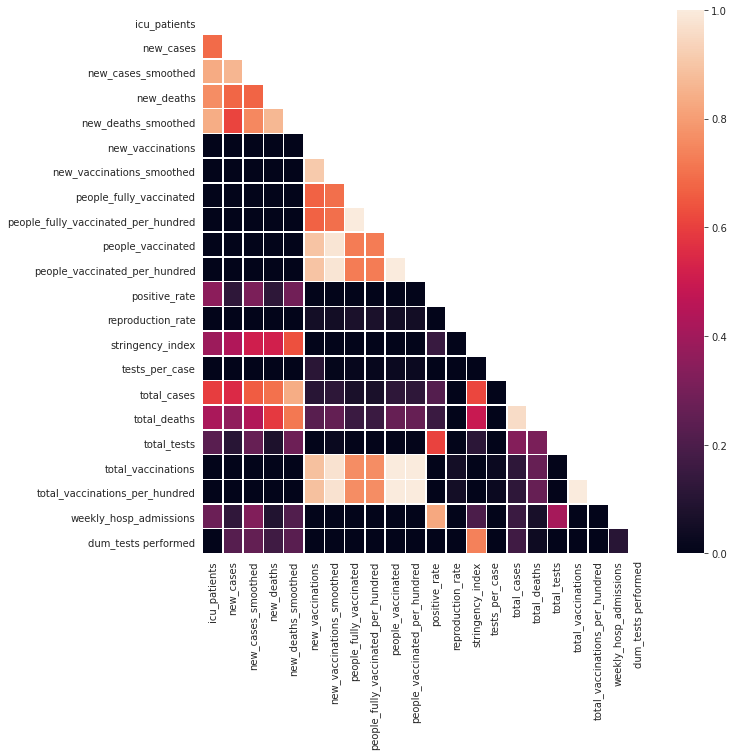

In [ ]:
corr = df_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(corr, mask=mask ,vmin=0, vmax=1, linewidths=.5 , annot_kws={"fontsize":15})

In [ ]:
#df_sel['year'] = df_sel['date'].str.extract(pat = '([0-9]+)').astype(int)
#df_sel['year'].unique()
    

#df_sel['month'] = df_sel['date'].str.extract(pat = '-([0-9]+)').astype(int)
#df_sel['month'].unique()
    

#new = df_sel["date"].str.split("-", n = -1, expand = True) 
#df_sel['day']= new[2].astype(str).astype(int)



c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


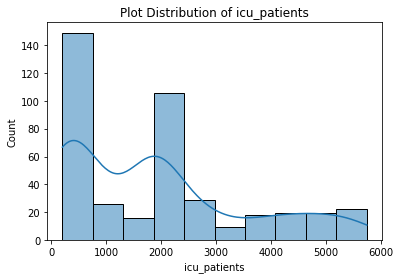

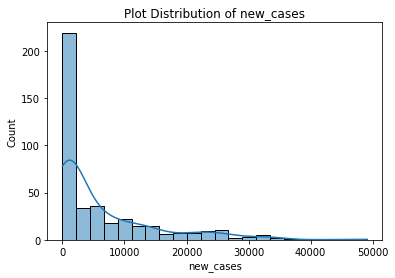

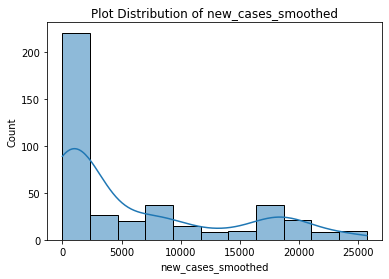

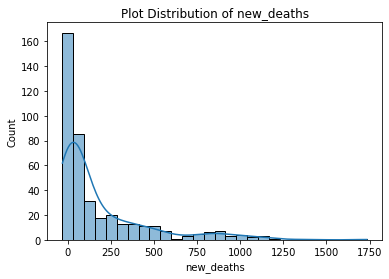

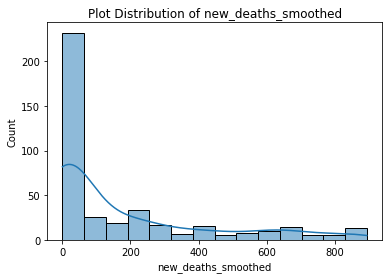

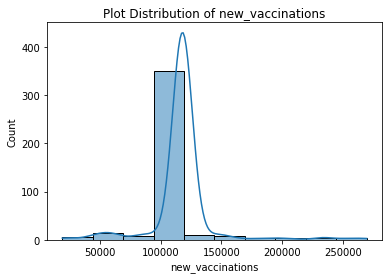

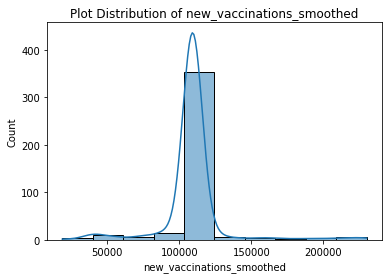

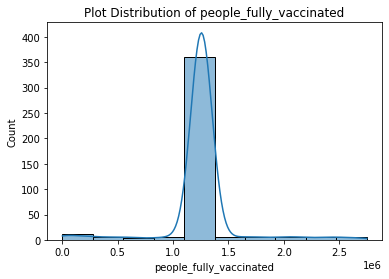

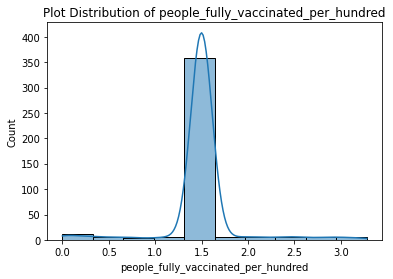

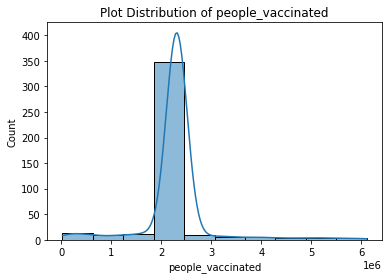

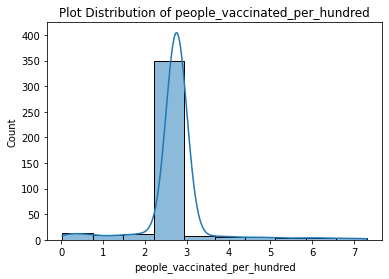

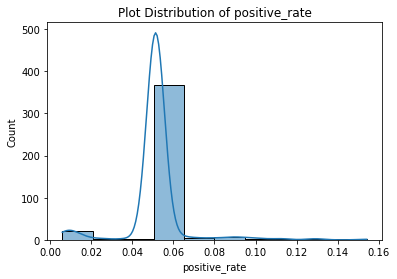

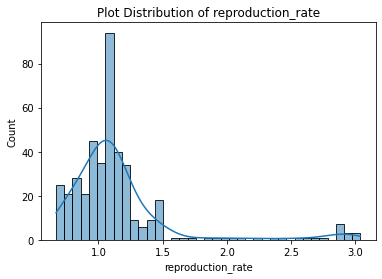

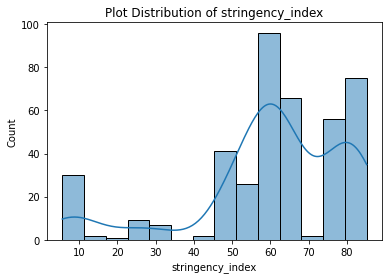

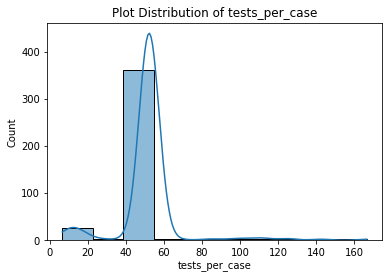

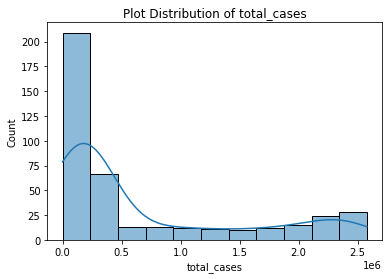

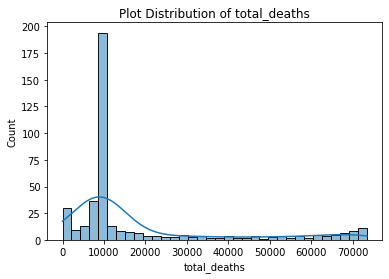

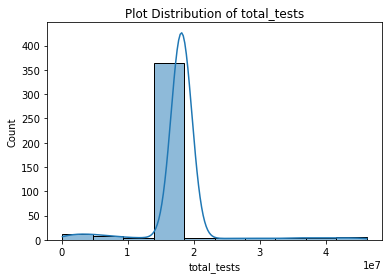

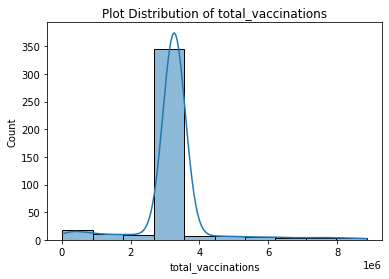

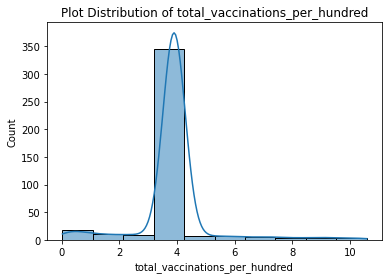

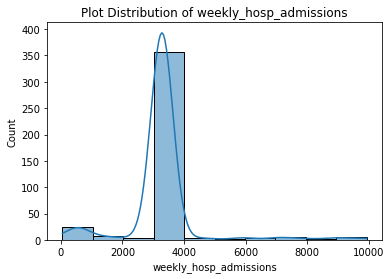

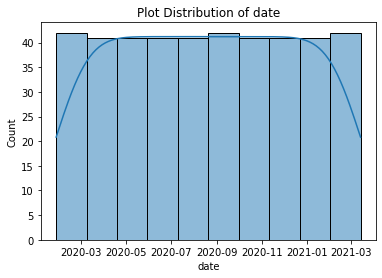

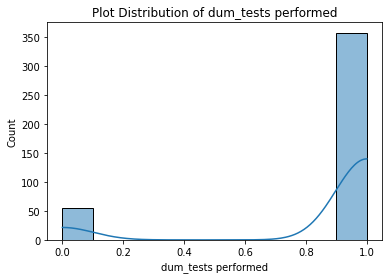

In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df_num,kde=True).set_title("Plot Distribution of "+col)

For 

- Number of active cases.
- Number of available beds at hospitals.
- Number of cumulated deaths.
- Number of recovered.

In [ ]:
df_num.columns

Index(['icu_patients', 'new_cases', 'new_cases_smoothed', 'new_deaths',
       'new_deaths_smoothed', 'new_vaccinations', 'new_vaccinations_smoothed',
       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
       'people_vaccinated', 'people_vaccinated_per_hundred', 'positive_rate',
       'reproduction_rate', 'stringency_index', 'tests_per_case',
       'total_cases', 'total_deaths', 'total_tests', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'weekly_hosp_admissions', 'date',
       'dum_tests performed'],
      dtype='object')

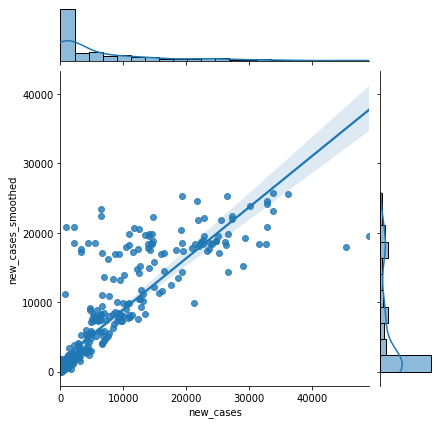

In [ ]:
sns.jointplot(x=df_num['new_cases'], y = df_num['new_cases_smoothed'] , kind='reg')

In [ ]:
df_y = df_num[['new_cases']]

In [ ]:
df_y.rename(columns={"new_cases": "active_cases"} , inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_x = df_num.drop('new_cases' , axis=1)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


<Figure size 432x288 with 0 Axes>

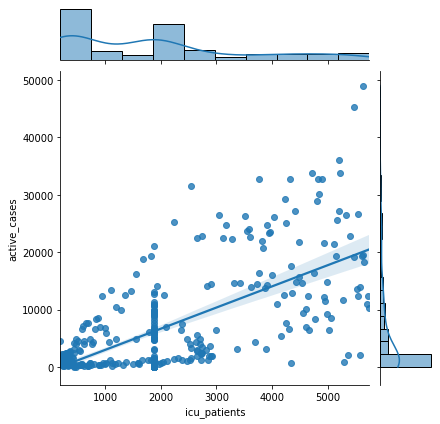

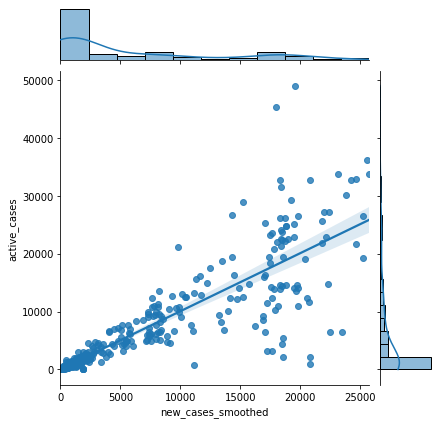

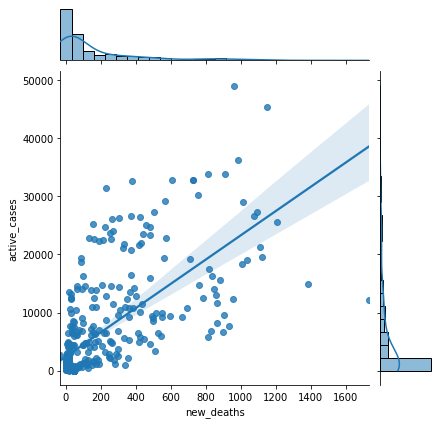

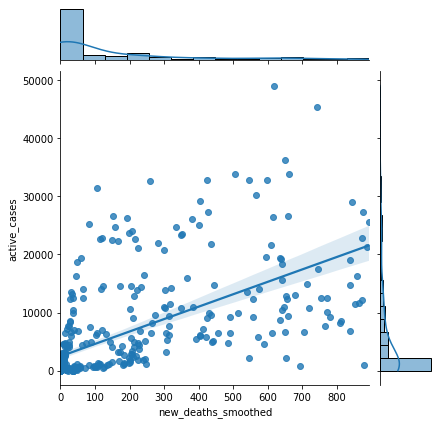

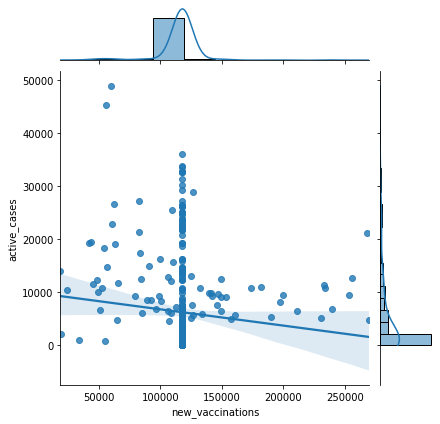

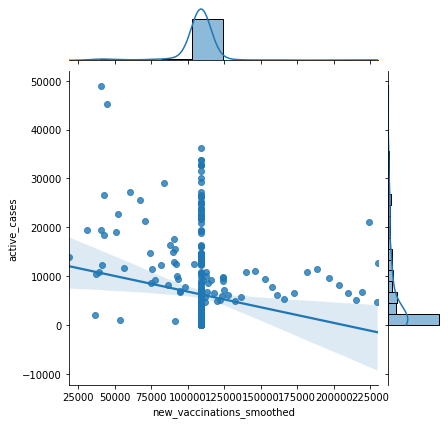

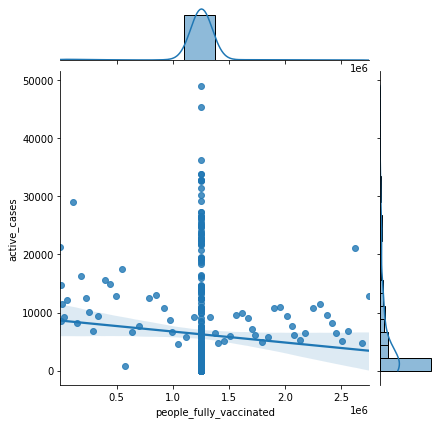

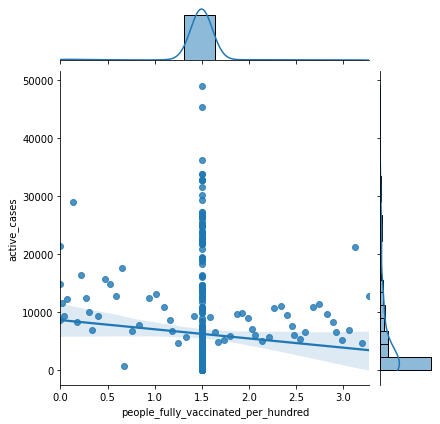

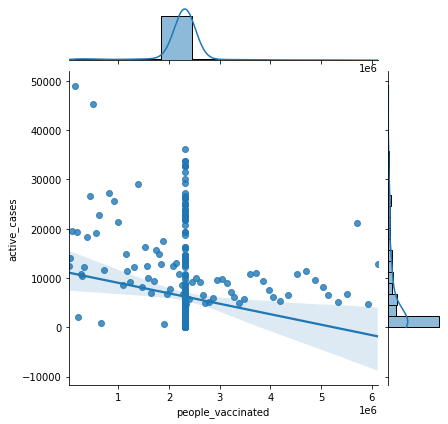

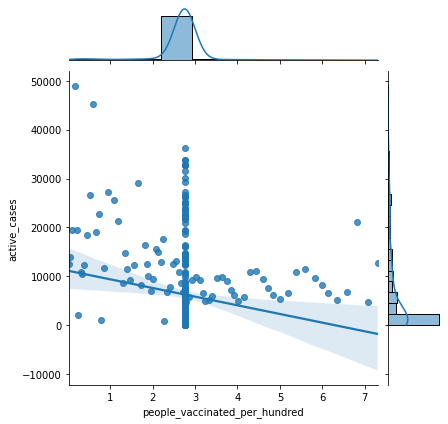

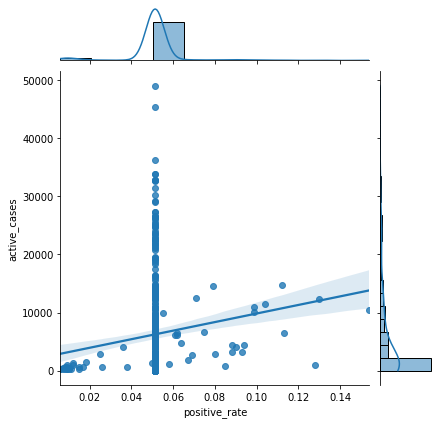

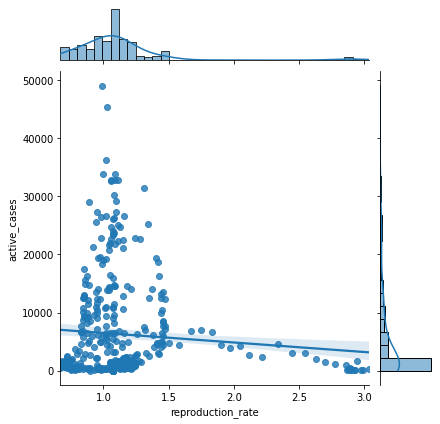

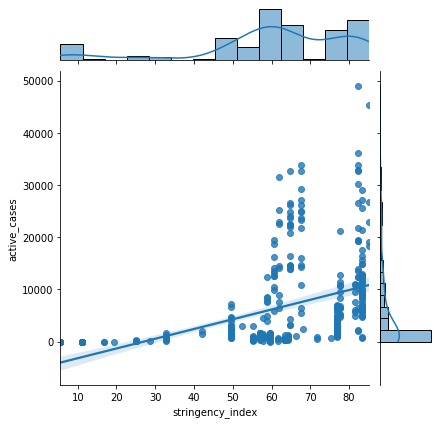

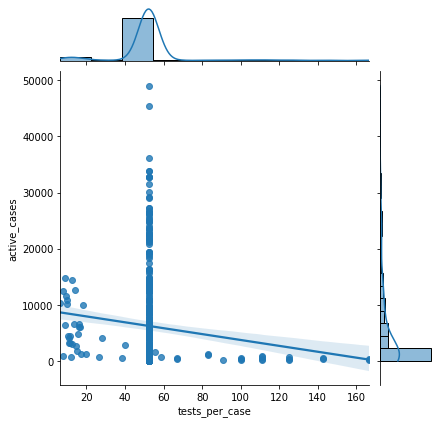

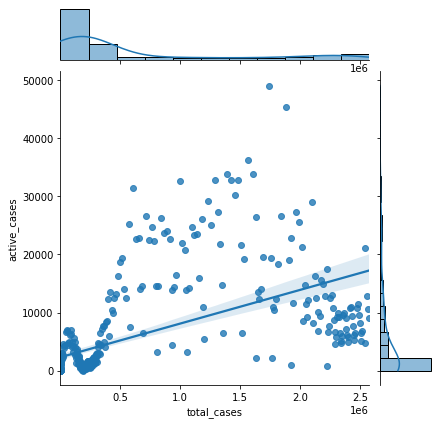

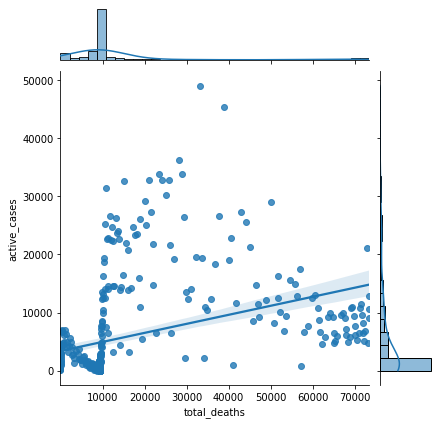

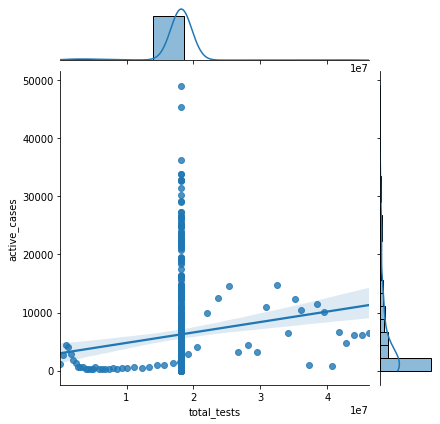

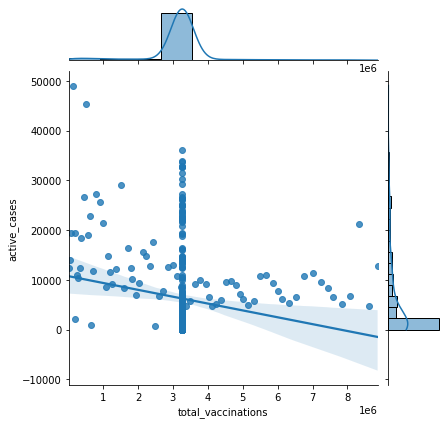

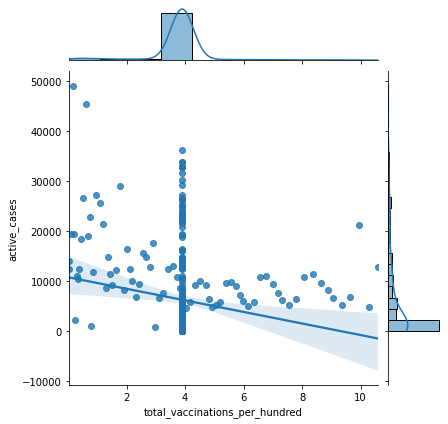

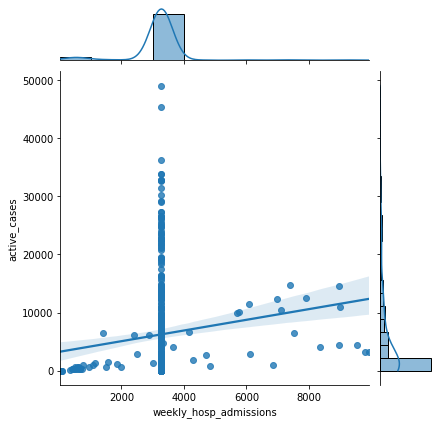

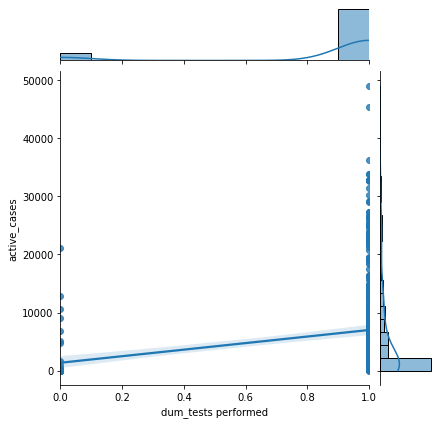

In [ ]:
grp = df_x.drop('date' , axis=1)
for i, col in enumerate(grp.columns):
    plt.figure(i)
    sns.jointplot(x= grp[col], y = df_y['active_cases'] , kind='reg')
    

Text(0.5, 1.0, 'active_case vs date ')

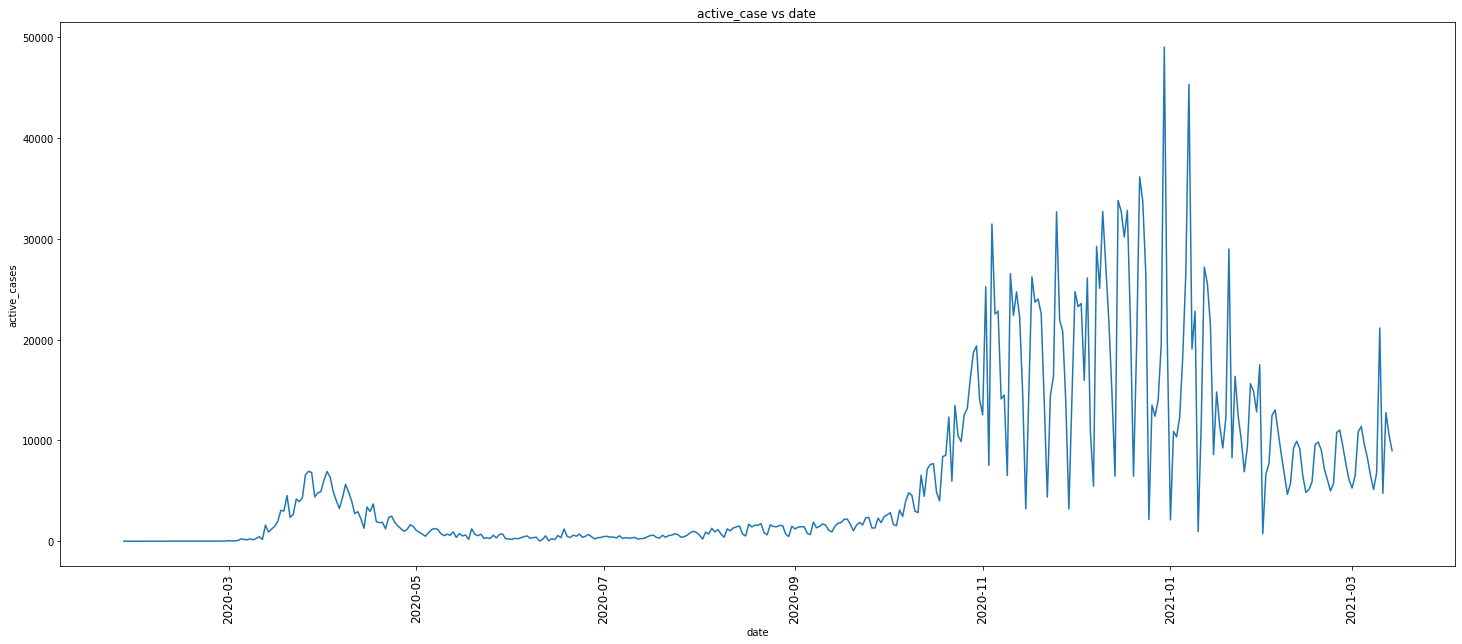

In [ ]:
fig = plt.figure( figsize = (25,10))
plt.xticks(rotation=90 , fontsize= 12)
sns.lineplot(x=df_x['date'],y=df_y['active_cases']).set_title("active_case vs date ")

<AxesSubplot:xlabel='date', ylabel='active_cases'>

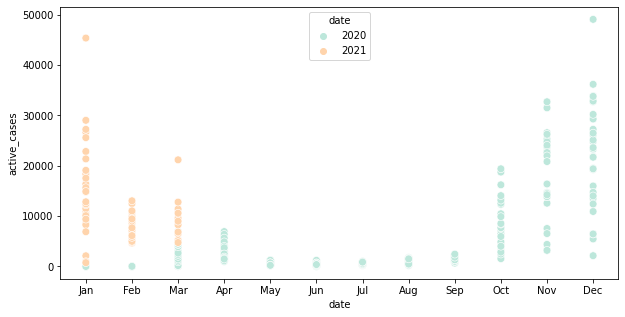

In [ ]:
fig = plt.figure( figsize = (10,5))
sns.scatterplot(x=df_x['date'].dt.strftime('%b') , y = df_y['active_cases'] , hue = df_x['date'].dt.year ,s = 60 , palette = 'icefire' )

Number of available beds at hospitals.

In [ ]:
df_ger['hospital_beds_per_thousand'].unique()

array([8.])

In [ ]:
df_ger['population'].unique()

array([83783945.])

In [ ]:
 ((df_ger['population']/1000)*df_ger['hospital_beds_per_thousand']).value_counts()

670271.56    413
dtype: int64

available beds = 670271.56

Number of cumulated deaths.

according to definition :
total_deaths - count of the cumulated deaths

Number of recovered.

In [ ]:
df_rec = df_ger['total_cases']-df_ger['total_deaths']

In [ ]:
df_rec.unique()

array([-9.344000e+03, -9.341000e+03, -9.340000e+03, -9.337000e+03,
       -9.335000e+03, -9.333000e+03, -9.332000e+03, -9.331000e+03,
       -9.329000e+03, -9.328000e+03, -9.318000e+03, -9.299000e+03,
       -9.297000e+03, -9.266000e+03, -9.215000e+03, -9.186000e+03,
       -9.149000e+03, -9.083000e+03, -8.863000e+03, -8.675000e+03,
       -8.546000e+03, -8.305000e+03,  1.174000e+03,  1.455000e+03,
        1.905000e+03,  2.075000e+03,  3.668000e+03,  4.576000e+03,
        5.784000e+03,  7.255000e+03,  9.233000e+03,  1.229900e+04,
        1.527600e+04,  1.978100e+04,  2.212900e+04,  2.477900e+04,
        2.893300e+04,  3.282900e+04,  3.711700e+04,  4.367100e+04,
        5.052900e+04,  5.726200e+04,  6.156200e+04,  6.624000e+04,
        7.103300e+04,  7.695200e+04,  8.368700e+04,  8.988400e+04,
        9.464800e+04,  9.853900e+04,  1.015640e+05,  1.056470e+05,
        1.109470e+05,  1.155740e+05,  1.194040e+05,  1.221720e+05,
        1.248320e+05,  1.268780e+05,  1.280650e+05,  1.309490e

In [ ]:
# extract year feature
df_x['year'] = df_x.date.dt.year
df_x.year

0      1
1      1
2      1
3      1
4      1
      ..
408    3
409    3
410    3
411    3
412    3
Name: date, Length: 413, dtype: int64

In [ ]:
# extract month feature
df_x['month'] = df_x.date.dt.month

In [ ]:
df_x.columns
df_x.drop('day' , axis=1,inplace=True)

# Implement Regression model

### Problem statement

Predicting the number of active cases in a given region is crucial to be capable of recommending a timeline for reopening/lockdown.

### Proposed work

To solve the stated problem, we'll be implementing a model that given different data of a given region, estimates the number of active cases.

### Success criteria

- Deliver a model of at least 80% accuracy.

### User stories


- As a policy maker, I should be capable of planning in advance lockdown/reopening timeline for my region.

- As a healthcare administrator, I should be capable of planning the required beds in a given region.

- As a data scientist, I should be able of knowing the focus-area(s) (country that we are working on)

### Tasks

- Select areas of focus (country that we are working on)
- Build a linear regression model to predict active cases in a week.
- Autocorrelation analysis of the variables.
- Train the model.
- Evaluate the model.



In [ ]:
# import
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Train set: (330, 7) (330, 1)
Test set: (83, 7) (83, 1)
0.8216892296862293
0.7657090042545742


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


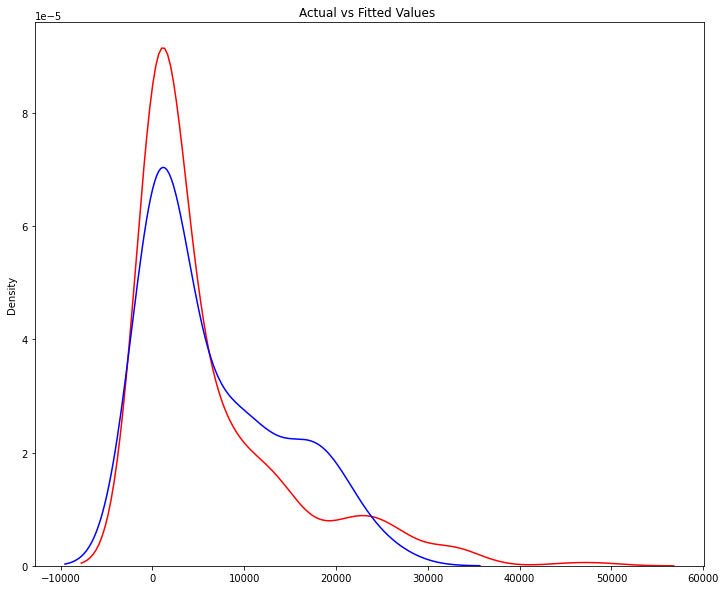

In [ ]:
X = df_x1[['new_cases_smoothed', 'new_deaths','new_deaths_smoothed','total_deaths','total_cases', 'reproduction_rate', 'stringency_index']]
Y = df_y
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
lm = LinearRegression( normalize = False ).fit(X_train,Y_train)

lm = LinearRegression( normalize = False ).fit(X_train,Y_train)
print(lm.score(X_train,Y_train))

yhat = lm.predict(X_test)
print(lm.score(X_test,Y_test))


plt.figure(figsize=( 12, 10))


ax1 = sns.distplot(x = Y, hist=False, color="r", label="Actual Value")
sns.distplot(x = yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ')

plt.show()
plt.close()

Split the data based on months 


In [ ]:
#train = df_num[df_num['date'].dt.year == 2020]
train = train[train['date'].dt.month<=6]
train = train.reset_index(drop=True)
X_train = train.drop(['new_cases' , 'date'] , axis=1)
#X_train = X_train[['new_cases_smoothed','new_deaths','new_deaths_smoothed','total_deaths','total_cases','reproduction_rate','stringency_index']]
X_train= preprocessing.StandardScaler().fit_transform(X_train)
Y_train = train[['new_cases']]
Y_train = preprocessing.StandardScaler().fit(Y_train).transform(Y_train)

#test = df_num[df_num['date'].dt.year == 2020]
test = test[test['date'].dt.month>6]
test = test.reset_index(drop=True)
X_test = test.drop(['new_cases' , 'date'] , axis=1)
#X_test = X_test[['new_cases_smoothed','new_deaths','new_deaths_smoothed','total_deaths','total_cases','reproduction_rate','stringency_index']]
X_test= preprocessing.StandardScaler().fit_transform(X_test)
Y_test = test[['new_cases']]
Y_test = preprocessing.StandardScaler().fit(Y_test).transform(Y_test)

Train set: (156, 21) (156, 1)
Test set: (184, 21) (184, 1)
0.9259374558619516
0.6029544564386462


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


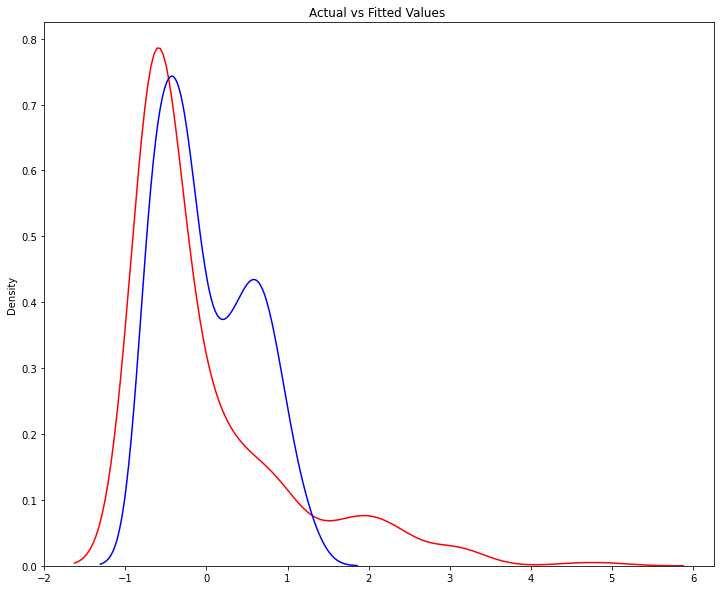

In [ ]:


print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
lm = LinearRegression( normalize = True ).fit(X_train,Y_train)

lm = LinearRegression( normalize = True ).fit(X_train,Y_train)
print(lm.score(X_train,Y_train))

yhat = lm.predict(X_test)
print(lm.score(X_test,Y_test))


plt.figure(figsize=( 12, 10))


ax1 = sns.distplot(x = Y, hist=False, color="r", label="Actual Value")
sns.distplot(x = yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ')

plt.show()
plt.close()
